In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Install all functions here

In [ ]:
! pip install rdkit requests gpflow tensorflow_probability numpy scipy scikit-learn scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 w

All imports will go here

In [ ]:
import pandas as pd
import pandas as pd
import requests
import time
from rdkit import Chem
import json

Load the Raw data

In [ ]:
dataDir = '/content/drive/Shareddrives/GCCP/GCCP/Raw_data_files/'
outputDir = '/content/drive/Shareddrives/GCCP/GCCP/Output_files/'
modelBuildingDataDir = '/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/'

! mkdir /content/drive/Shareddrives/GCCP/GCCP/Output_files

In [ ]:
JRGC_Data_dF = pd.read_csv(dataDir + 'JRGC_Data_cleaned.csv')
JRGC_Data_dF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3454,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3455,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3456,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3457,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
Hvap_CRC_dF = pd.read_csv(modelBuildingDataDir+'Hvap_prediction_data_fcl_with_N.csv')
Pc_CRC_dF = pd.read_csv(modelBuildingDataDir+'Pc_prediction_data_fcl_with_N.csv')
Vc_CRC_dF = pd.read_csv(modelBuildingDataDir+'Vc_prediction_data_fcl_with_N.csv')
Tc_CRC_dF = pd.read_csv(modelBuildingDataDir+'Tc_prediction_data_fcl_with_N.csv')
Tb_CRC_dF = pd.read_csv(modelBuildingDataDir+'Tb_prediction_data_fcl_with_N.csv')
Tm_CRC_dF = pd.read_csv(modelBuildingDataDir+'Tm_prediction_data_fcl_with_N.csv')
logP_CRC_dF = pd.read_csv(modelBuildingDataDir+'logP_prediction_data_fcl_with_N.csv')

Train Gaussian Processes (GP) on physicochemical properties

Combining all properties in a single code

In [ ]:
method_number = 2

STARTING AUTOMATED GP TRAINING FOR ALL PROPERTIES
Properties to process: ['Tb', 'Tm', 'Pc', 'Vc', 'Tc', 'Hvap', 'logP']
Method: 2, Kernel: RQ, Retrains: 10
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/

############################################################
PROCESSING 1/7: Tb
############################################################

PROCESSING PROPERTY: Tb
Loading data for Tb from /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tb_prediction_data_fcl_with_N.csv
Shape of /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tb_prediction_data_fcl_with_N.csv: (1030, 5)
Loaded data for Tb: 1030 samples, 2 features
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tb/model_2
training_loss = 8934.142991871176
condition_number = 43.617174363596924
training_loss = 6576.154045664208
condition_number = 1802.938789500884
training_loss = 5123.428718397145
condition_number = 163.0512590354233
training_loss = 5131.254522985104
condi

/tmp/ipython-input-2374726447.py:474: UserWarning: GP optimizer failed to converge with retrains
  warnings.warn('GP optimizer failed to converge with retrains')
Traceback (most recent call last):
  File "/tmp/ipython-input-2374726447.py", line 796, in process_single_property
    best_lml = best_lml.numpy()
               ^^^^^^^^^^^^^^
AttributeError: 'float' object has no attribute 'numpy'


Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tm/model_2
training_loss = 10437.192021060331
condition_number = 51.936514869622876
training_loss = 9793.484723260368
condition_number = 2702.610865833003
training_loss = 9809.811958277503
condition_number = 261.50164294169224
training_loss = 9816.777323284605
condition_number = 184.93389322985988
training_loss = 9819.798963746316
condition_number = 618.9295706218433
training_loss = 9836.41695860409
condition_number = 1919.9651333531638
training_loss = 13924.45865617571
condition_number = 27.899309286321934
training_loss = 10083.017375177918
condition_number = 1021.6270840637667
training_loss = 10108.337138690564
condition_number = 74.87745611261104
training_loss = 9791.07001251746
condition_number = 232.13664033786384
Best LML: -9791.07001251746, Fit Success: True, Condition Number: 232.13664033786384

STATISTICAL METRICS FOR Tm
--------------------------------------------------
Metric     Training     Test         I

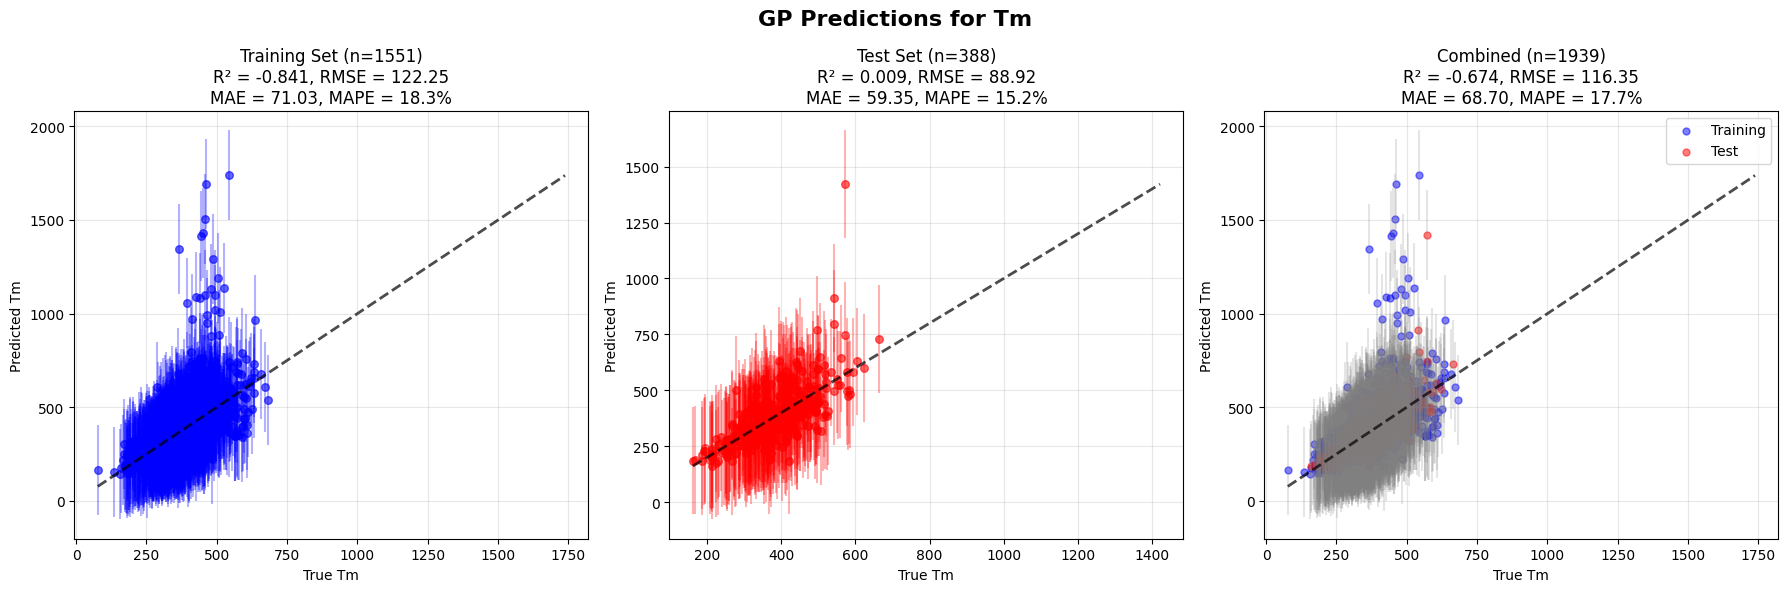


Confidence Interval Analysis for Tm:
Training: 44.0/1551 (2.8%) outside 95% CI
Test: 4.0/388 (1.0%) outside 95% CI

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tm/model_2
Files created:
  - Tm_GP_results.png (side-by-side plots)
  - Tm_metrics.csv (metrics table with improvement)
  - Tm_summary.json (complete summary)

✓ Tm completed successfully in 2262.93 seconds

############################################################
PROCESSING 3/7: Pc
############################################################

PROCESSING PROPERTY: Pc
Loading data for Pc from /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Pc_prediction_data_fcl_with_N.csv
Shape of /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Pc_prediction_data_fcl_with_N.csv: (75, 5)
Loaded data for Pc: 75 samples, 2 features
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Pc/model_2
training_loss = 188.62388098322378
condition_number = 8.175278650400859
training_loss = 1

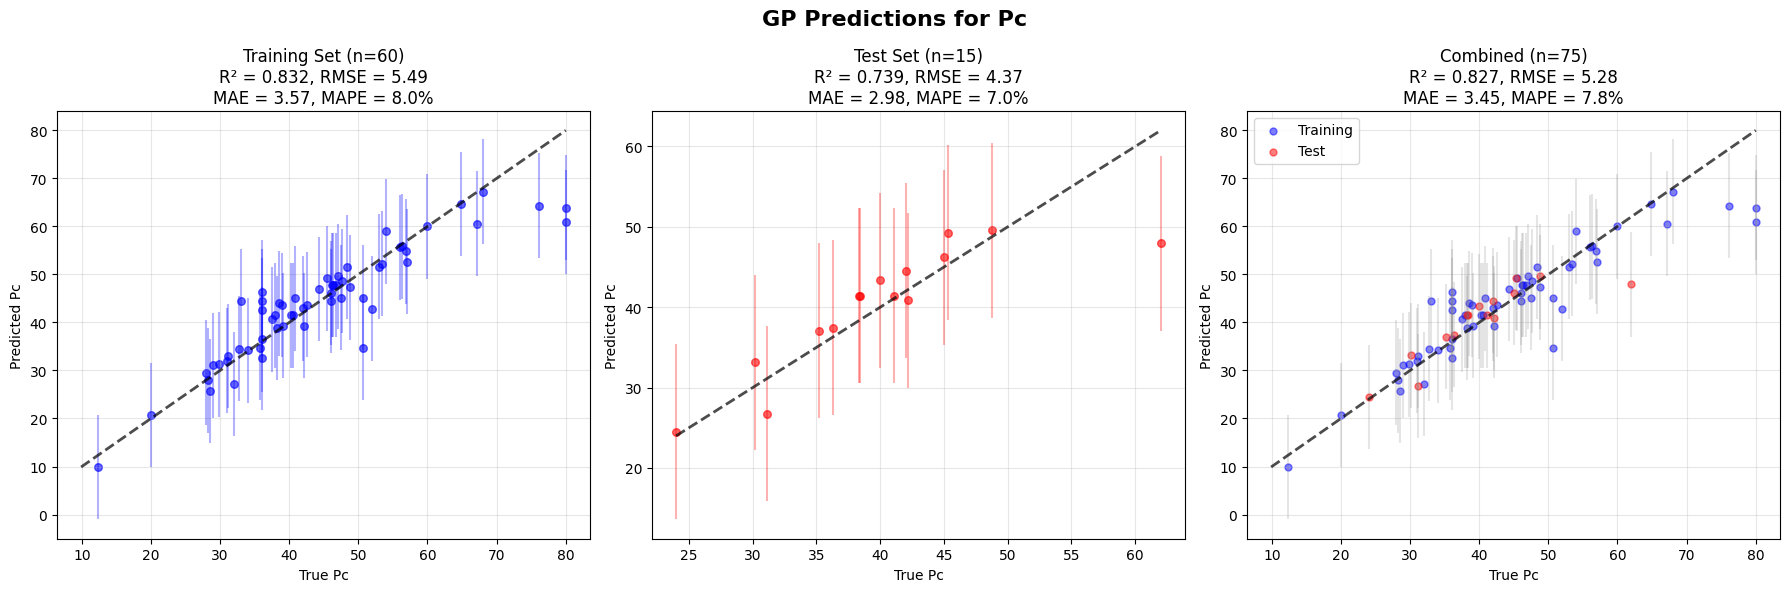


Confidence Interval Analysis for Pc:
Training: 5.0/60 (8.3%) outside 95% CI
Test: 1.0/15 (6.7%) outside 95% CI

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Pc/model_2
Files created:
  - Pc_GP_results.png (side-by-side plots)
  - Pc_metrics.csv (metrics table with improvement)
  - Pc_summary.json (complete summary)

✓ Pc completed successfully in 13.95 seconds

############################################################
PROCESSING 4/7: Vc
############################################################

PROCESSING PROPERTY: Vc
Loading data for Vc from /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Vc_prediction_data_fcl_with_N.csv
Shape of /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Vc_prediction_data_fcl_with_N.csv: (69, 5)
Loaded data for Vc: 69 samples, 2 features
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Vc/model_2
training_loss = 247.83455801400538
condition_number = 9.092873326831866
training_loss = 248.393

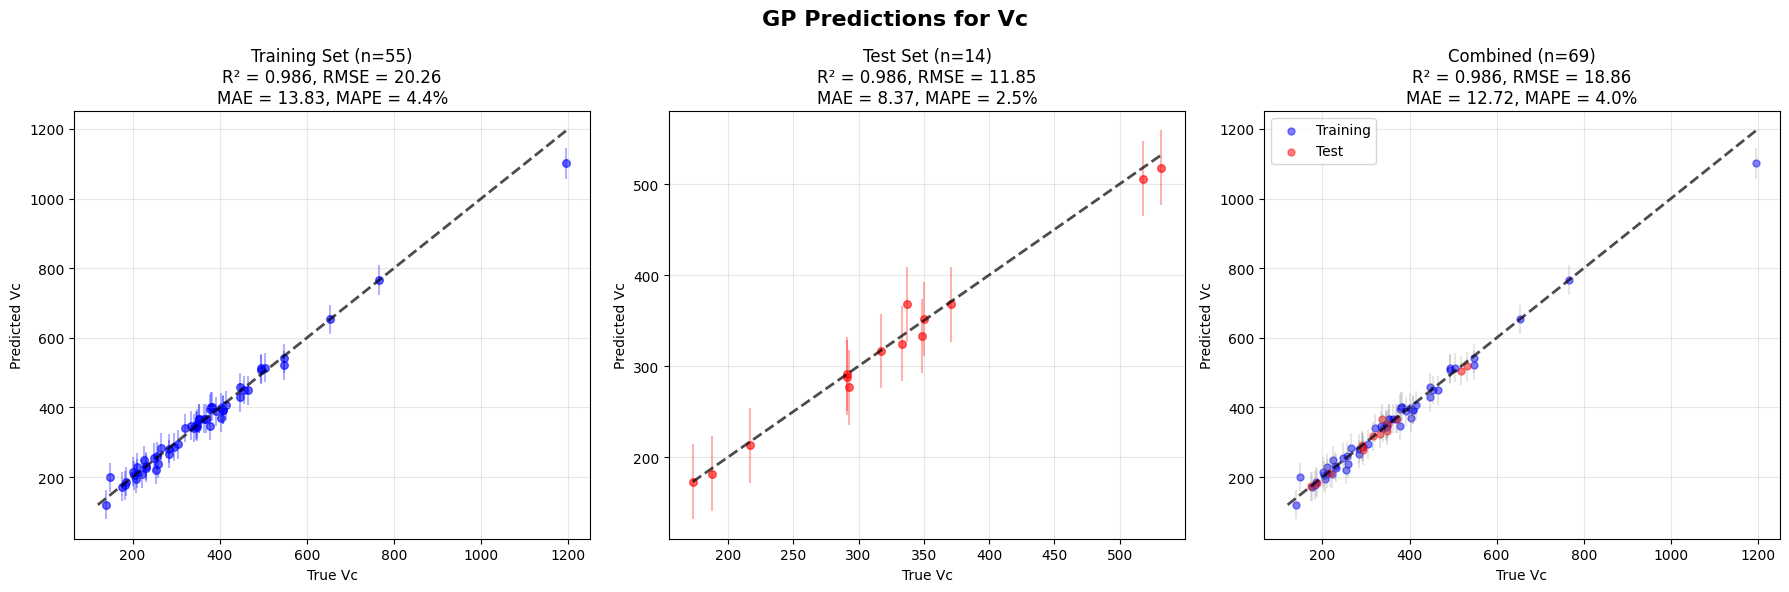


Confidence Interval Analysis for Vc:
Training: 2.0/55 (3.6%) outside 95% CI
Test: 0.0/14 (0.0%) outside 95% CI

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Vc/model_2
Files created:
  - Vc_GP_results.png (side-by-side plots)
  - Vc_metrics.csv (metrics table with improvement)
  - Vc_summary.json (complete summary)

✓ Vc completed successfully in 12.92 seconds

############################################################
PROCESSING 5/7: Tc
############################################################

PROCESSING PROPERTY: Tc
Loading data for Tc from /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tc_prediction_data_fcl_with_N.csv
Shape of /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tc_prediction_data_fcl_with_N.csv: (75, 5)
Loaded data for Tc: 75 samples, 2 features
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tc/model_2
training_loss = 306.77724150390947
condition_number = 8.175278650400859
training_loss = 306.777

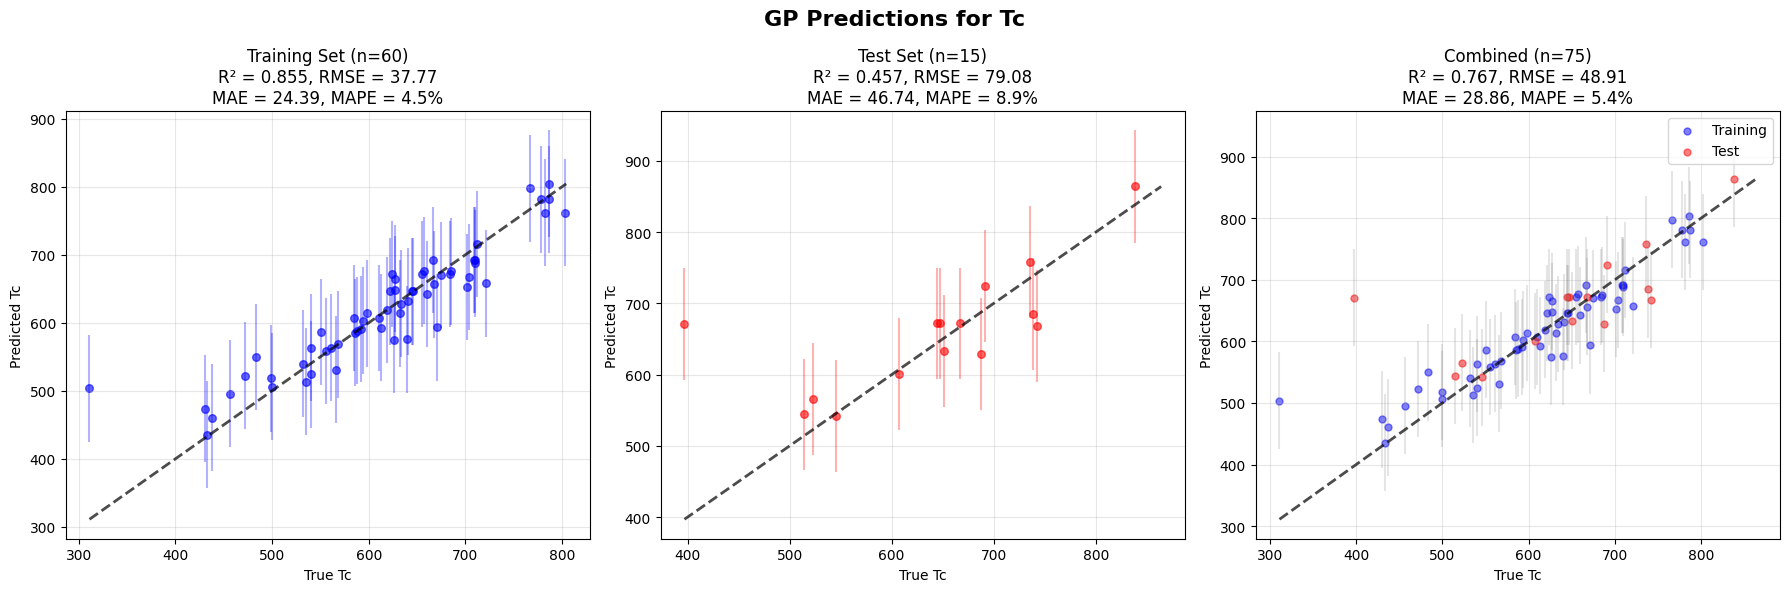


Confidence Interval Analysis for Tc:
Training: 1.0/60 (1.7%) outside 95% CI
Test: 1.0/15 (6.7%) outside 95% CI

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tc/model_2
Files created:
  - Tc_GP_results.png (side-by-side plots)
  - Tc_metrics.csv (metrics table with improvement)
  - Tc_summary.json (complete summary)

✓ Tc completed successfully in 14.76 seconds

############################################################
PROCESSING 6/7: Hvap
############################################################

PROCESSING PROPERTY: Hvap
Loading data for Hvap from /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Hvap_prediction_data_fcl_with_N.csv
Shape of /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Hvap_prediction_data_fcl_with_N.csv: (75, 5)
Loaded data for Hvap: 75 samples, 2 features
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Hvap/model_2
training_loss = 186.11658143619556
condition_number = 6.898703425157256
training_

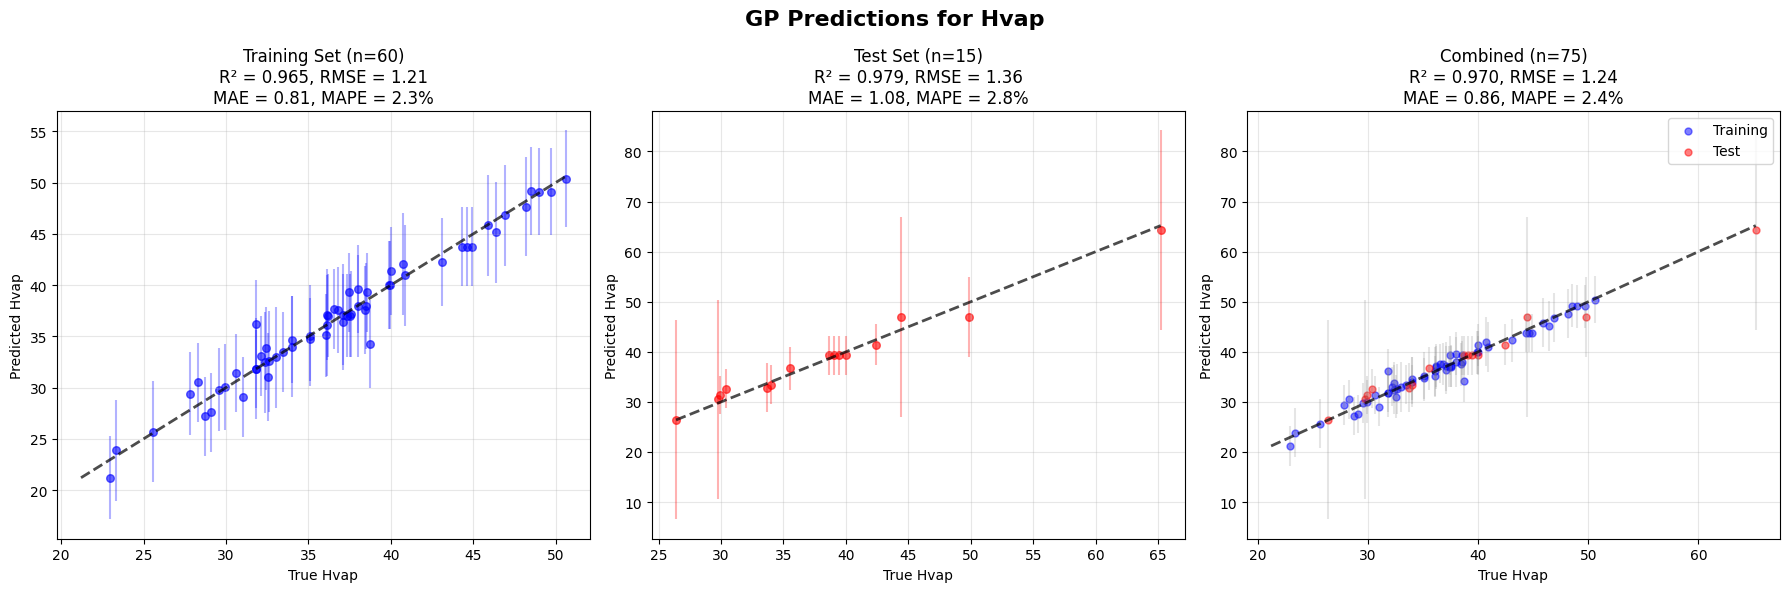


Confidence Interval Analysis for Hvap:
Training: 2.0/60 (3.3%) outside 95% CI
Test: 0.0/15 (0.0%) outside 95% CI

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Hvap/model_2
Files created:
  - Hvap_GP_results.png (side-by-side plots)
  - Hvap_metrics.csv (metrics table with improvement)
  - Hvap_summary.json (complete summary)

✓ Hvap completed successfully in 13.37 seconds

############################################################
PROCESSING 7/7: logP
############################################################

PROCESSING PROPERTY: logP
Loading data for logP from /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/logP_prediction_data_fcl_with_N.csv
Shape of /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/logP_prediction_data_fcl_with_N.csv: (3536, 5)
Loaded data for logP: 3463 samples, 2 features
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/logP/model_2
training_loss = 3032.7025563686625
condition_number = 97.26814418

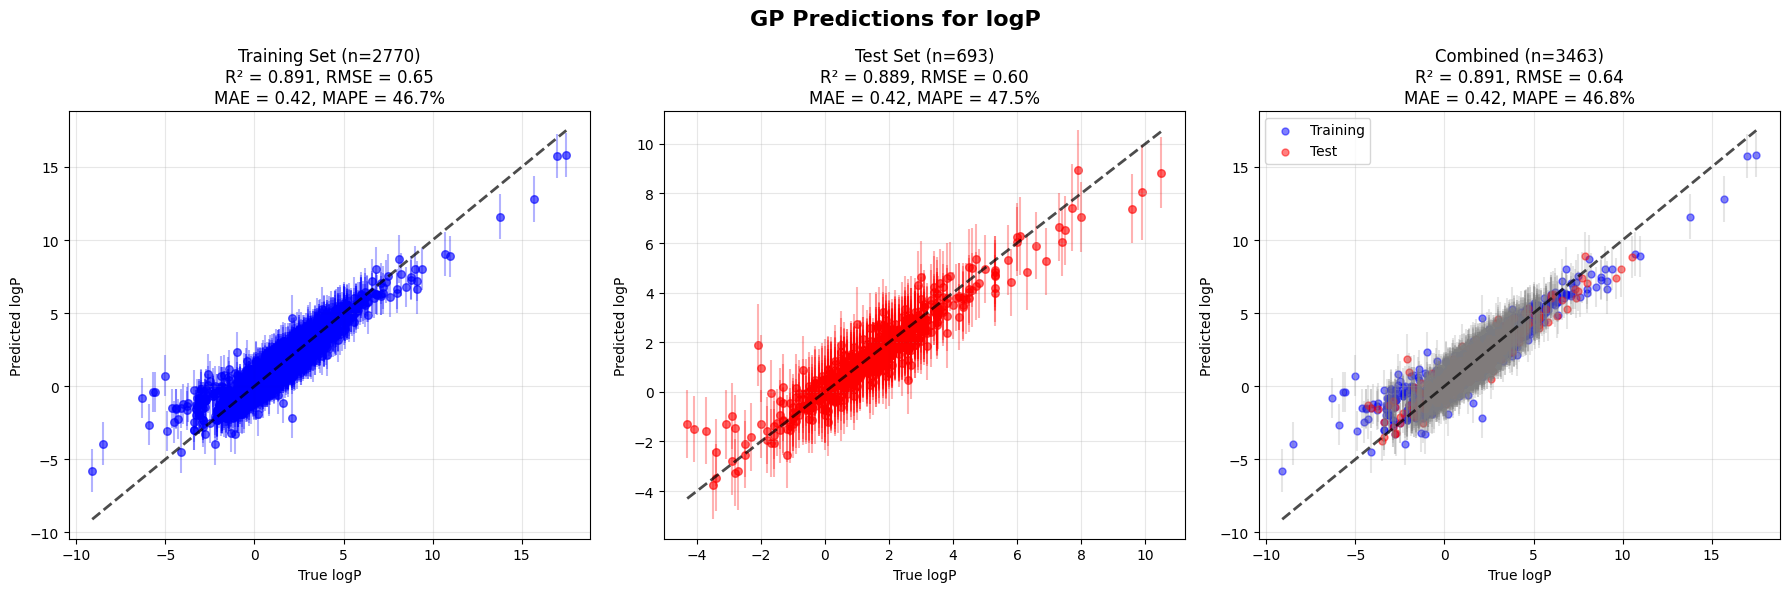


Confidence Interval Analysis for logP:
Training: 109.0/2770 (3.9%) outside 95% CI
Test: 25.0/693 (3.6%) outside 95% CI

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/logP/model_2
Files created:
  - logP_GP_results.png (side-by-side plots)
  - logP_metrics.csv (metrics table with improvement)
  - logP_summary.json (complete summary)

✓ logP completed successfully in 3136.89 seconds

AUTOMATION COMPLETE
Total time elapsed: 5765.97 seconds (96.1 minutes)
Successfully processed: 6/7 properties
Successful: ['Tm', 'Pc', 'Vc', 'Tc', 'Hvap', 'logP']
Failed: ['Tb']

COMPREHENSIVE STATISTICAL METRICS TABLE - ALL PROPERTIES
Property                      Train                                                       Test                                                        Combined                                
          R²      MAE     RMSE    MAPE    MPE          R²      MAE     RMSE    MAPE    MPE          R²      MAE     RMSE    MAPE    MPE          
------------------

In [ ]:
# -*- coding: utf-8 -*-
"""
Script to train a GP on physicochemical properties.
"""


import os
import warnings
import time

# Specific
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import gpflow
from gpflow.utilities import print_summary, set_trainable, deepcopy
import tensorflow as tf
from tensorflow_probability import bijectors as tfb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# =============================================================================
# Auxiliary Functions
# =============================================================================


def set_white_exp_95CI(code):
    """
    Sets the estimated average ~95% confidence interval on labels using the property code

    Parameters:
    code : string
        Property code

    Returns:
    exp_95CI : float
    """
    if code == 'Tb':
        exp_95CI = 10.0
    elif code == 'Tm':
        exp_95CI = 5.0
    elif code == 'Hvap':
        exp_95CI = 1.0
    elif code == 'Vc':
        exp_95CI = 25.0
    elif code == 'Tc':
        exp_95CI = 5.0
    elif code == 'Pc':
        exp_95CI = 30.0
    elif code == 'logP':
        exp_95CI = 0.0
    return exp_95CI



def gpConfig_from_method(method_number, code, kernel = 'RBF', anisotropic = False, useWhiteKernel = True, trainLikelihood = True, opt_method = 'L-BFGS-B'):
    """
    Creates a gpConfig dictionary based on the method number.

    Parameters:
    method_number : int
        Method number.

    Returns:
    gpConfig : dictionary
        Dictionary of GP configuration parameters.

    Note:
    method_number is used to define which type of gp model to use
    1: Y = GP(0, K(Mw, Y_gc))
    2: Y - Y_gc = GP(0, K(Mw))
    3: Y - Y_gc = GP(0, K(Mw, Y_gc))
    4: Y = GP(Y_gc, K(Mw, Y_gc))
    5: Y = GP(AMw + BY_gc + c, K(Mw, Y_gc))
    """
    gpConfig={'kernel': kernel,
           'useWhiteKernel':useWhiteKernel,
           'trainLikelihood':trainLikelihood,
           'opt_method':opt_method,
           'anisotropic':anisotropic}
    if method_number == 1:
        gpConfig['mean_function']='Zero'
        gpConfig['Name']='y_exp = GP(0, K(x1,x2))'
        gpConfig['SaveName']='model_1'
    if method_number == 2:
        gpConfig['mean_function']='Zero'
        gpConfig['Name']='y_exp = y_GC + GP(0, K(x1))'
        gpConfig['SaveName']='model_2'
    if method_number == 3:
        gpConfig['mean_function']='Constant'
        gpConfig['Name']='y_exp = GP(y_GC, K(x1,x2))'
        gpConfig['SaveName']='model_3'
    if method_number == 4:
        gpConfig['mean_function']='Linear'
        gpConfig['Name']='y_exp = GP(B@X, K(x1,x2))'
        gpConfig['SaveName']='model_4'
    else:
        if method_number not in [1 , 2, 3, 4]:
            raise ValueError('invalid method number input')
    return gpConfig


def get_gp_data(X, Y, method_number):
    """
    Gets X and Y data to train GP based on the method number

    Parameters:
    X : numpy array
        Features data.
    Y : numpy array
        Property data.
    method_number : int
        Method number

    Returns:
    X_gp : numpy array
        Features data to train GP.
    Y_gp: numpy array
        Data to train GP.
    Y_gc: numpy array
        Data from Joback method
    """
    if method_number == 2:
        X_gp = X[:,0].reshape(-1,1)
    else:
        X_gp = X
    if method_number == 2:
        Y_gp = Y - X[:,1]
    else:
        Y_gp = Y
    Y_gp = Y_gp.reshape(-1,1)
    Y_gc = X[:,1].reshape(-1,1)
    return X_gp, Y_gp, Y_gc


def discrepancy_to_property(method_number, y_pred, y_gc, idx):
    """
    Adds discrepancy to property based on the method number
    Parameters:
    method_number : int
        Method number
    y_pred : numpy array
        GP predicted output
    y_gc : numpy array
        Predicted GC method results
    idx : np.array
        Index of the y_gc to be added to y_pred

    Returns:
    y_prop : numpy array
        Predicted property value
    """
    if method_number == 2:
        y_prop = y_pred + y_gc[idx.flatten(),:]
    else:
        y_prop = y_pred
    return y_prop

def stratifyvector(Y):
    """
    Creates a stratified vector based on the label data Y

    Parameters:
    Y : numpy array
        label data
    Returns:
    stratifyVector : numpy array
        Stratified vector
    """
    # Iterate over number of bins, trying to find the larger number of bins that
    # guarantees at least 5 values per bin
    for n in range(1,100):
        # Bin Y using n bins
        stratifyVector=pd.cut(Y,n,labels=False)
        # Define isValid (all bins have at least 5 values)
        isValid=True
        # Check that all bins have at least 5 values
        for k in range(n):
            if np.count_nonzero(stratifyVector==k)<5:
                isValid=False
        #If isValid is false, n is too large; nBins must be the previous iteration
        if not isValid:
            nBins=n-1
            break
    # Generate vector for stratified splitting based on labels
    stratifyVector=pd.cut(Y,nBins,labels=False)
    return stratifyVector

def normalize(inputArray,skScaler=None,method='Standardization',reverse=False):
    """
    normalize() normalizes (or unnormalizes) inputArray using the method
    specified and the skScaler provided.

    Parameters
    ----------
    inputArray : numpy array
        Array to be normalized. If dim>1, array is normalized column-wise.
    skScaler : scikit-learn preprocessing object or None
        Scikit-learn preprocessing object previosly fitted to data. If None,
        the object is fitted to inputArray.
        Default: None
    method : string, optional
        Normalization method to be used.
        Methods available:
            . Standardization - classic standardization, (x-mean(x))/std(x)
            . MinMax - scale to range (0,1)
            . LogStand - standardization on the log of the variable,
                         (log(x)-mean(log(x)))/std(log(x))
            . Log+bStand - standardization on the log of variables that can be
                           zero; uses a small buffer,
                           (log(x+b)-mean(log(x+b)))/std(log(x+b))
        Default: 'Standardization'
    reverse : bool
        Whether  to normalize (False) or unnormalize (True) inputArray.
        Defalt: False

    Returns
    -------
    inputArray : numpy array
        Normalized (or unnormalized) version of inputArray.
    skScaler : scikit-learn preprocessing object
        Scikit-learn preprocessing object fitted to inputArray. It is the same
        as the inputted skScaler, if it was provided.

    """
    # If inputArray is a labels vector of size (N,), reshape to (N,1)
    if inputArray.ndim==1:
        inputArray=inputArray.reshape((-1,1))
        warnings.warn('Input to normalize() was of shape (N,). It was assumed'\
                      +' to be a column array and converted to a (N,1) shape.')
    # If skScaler is None, train for the first time
    if method == 'None':
        inputArray=inputArray
        skScaler = None
    else:
        if skScaler is None:
            # Check method
            if method=='Standardization' or method=='MinMax': aux=inputArray
            elif method=='LogStand': aux=np.log(inputArray)
            elif method=='Log+bStand': aux=np.log(inputArray+10**-3)
            else: raise ValueError('Could not recognize method in normalize().')
            if method!='MinMax':
                skScaler=preprocessing.StandardScaler().fit(aux)
            else:
                skScaler=preprocessing.MinMaxScaler().fit(aux)
        # Do main operation (normalize or unnormalize)
        if reverse:
            # Rescale the data back to its original distribution
            inputArray=skScaler.inverse_transform(inputArray)
            # Check method
            if method=='LogStand': inputArray=np.exp(inputArray)
            elif method=='Log+bStand': inputArray=np.exp(inputArray)-10**-3
        elif not reverse:
            # Check method
            if method=='Standardization' or method=='MinMax': aux=inputArray
            elif method=='LogStand': aux=np.log(inputArray)
            elif method=='Log+bStand': aux=np.log(inputArray+10**-3)
            else: raise ValueError('Could not recognize method in normalize().')
            inputArray=skScaler.transform(aux)
    # Return
    return inputArray,skScaler



# Build GPR model function with bounded hyperparameters
def build_model_with_bounded_params(X, Y, kern, low, high, \
                                    high_alpha, init_val1, init_val2, init_val3, \
                                    useWhite, trainLikelihood, anisotropic, typeMeanFunc):
    """
    build_model_with_bounded_params(*) creates a GP model object with bounded hyperparameters and initial
    values

    Parameters
    ----------
    X : numpy array
        Feature data
    Y : numpy array
        Label data
    low : float
        lower bound on all hyperparameters
    high : float
        upper bound on all hyperparameters except alpha for the RQ kernel
    high_alpha : float
        upper bound on alpha hyperparameter for the RQ kernel
    init_val1 : float
        initial values for first length scale and alpha parameter
    init_val2 : float
        initial values for second length scale for anisotropic kernels
        for isotropic kernels, only one initial value (init_val1) is used
    init_val1 : float
        initial values for variance or scale hyperparameter of kernel 1 (not Whitenoise kernel)

    Returns
    -------
    model : Gpflow model object
        GP model object with bounded hyperparameters and initial values

    """

    low = tf.cast(low, dtype=tf.float64)
    high = tf.cast(high, dtype=tf.float64)
    high_alpha = tf.cast(high_alpha, dtype=tf.float64)
    init_val1 = tf.cast(init_val1, dtype=tf.float64)
    init_val2 = tf.cast(init_val2, dtype=tf.float64)
    init_val3 = tf.cast(init_val3, dtype=tf.float64)
    if anisotropic == True:
        lsc = gpflow.Parameter([init_val1, init_val2], transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    else:
        lsc = gpflow.Parameter(init_val1, transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    alf = gpflow.Parameter(init_val1, transform=tfb.Sigmoid(low , high_alpha), dtype=tf.float64)
    var = gpflow.Parameter(init_val3, transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    if kern == "RQ":
        kernel_ = gpflow.kernels.RationalQuadratic()
        kernel_.alpha = alf
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "RBF":
        kernel_ = gpflow.kernels.RBF()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern12":
        kernel_ = gpflow.kernels.Matern12()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern32":
        kernel_ = gpflow.kernels.Matern32()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern52":
        kernel_ = gpflow.kernels.Matern52()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    if useWhite == True:
        #white_var = np.array(np.random.uniform(0.05, 1.0))
        final_kernel = kernel_+gpflow.kernels.White(variance=1.0)
    else:
        final_kernel = kernel_

    if typeMeanFunc == 'Zero':
        mf = None
    if typeMeanFunc == 'Constant':
        #If constant value is selected but no value is given, default to zero mean
        mf_val = np.array([0,1]).reshape(-1,1)
        mf = gpflow.functions.Linear(mf_val)
    if typeMeanFunc == 'Linear':
        A = np.ones((X.shape[1],1))
        mf = gpflow.functions.Linear(A)
    model_ = gpflow.models.GPR(data=(X, Y), kernel=final_kernel, mean_function=mf, noise_variance=10**-5)
    if typeMeanFunc == 'Constant':
        gpflow.set_trainable(model_.mean_function.A, False)
        gpflow.set_trainable(model_.mean_function.b, False)
    gpflow.utilities.set_trainable(model_.likelihood.variance,trainLikelihood)
    model = model_
    return model



def buildGP(X_Train, Y_Train, gpConfig, code, featurenorm, retrain_count):
    """
    buildGP() builds and fits a GP model using the training data provided.

    Parameters
    ----------
    X_Train : numpy array (N,K)
        Training features, where N is the number of data points and K is the
        number of independent features
    Y_Train : numpy array (N,1)
        Training labels (e.g., property of a given molecule).
    gpConfig : dictionary, optional
        Dictionary containing the configuration of the GP. If a key is not
        present in the dictionary, its default value is used.
        Keys:
            . kernel : string
                Kernel to be used. One of:
                    . 'RBF' - gpflow.kernels.RBF()
                    . 'RQ' - gpflow.kernels.RationalQuadratic()
                    . 'Matern12' - gpflow.kernels.Matern12()
                    . 'Matern32' - gpflow.kernels.Matern32()
                    . 'Matern52' - gpflow.kernels.Matern52()
                The default is 'RQ'.
            . useWhiteKernel : boolean
                Whether to use a White kernel (gpflow.kernels.White).
                The default is True.
            . trainLikelihood : boolean
                Whether to treat the variance of the likelihood of the modeal
                as a trainable (or fitting) parameter. If False, this value is
                fixed at 10^-5.
                The default is True.
        The default is {}.
    sc_y_scale : Scikit learn standard scaler object
        standard scaler fitted on label training data
    retrain_count : int
        Current GP retrain number

    """
    # Unpack gpConfig
    kernel=gpConfig.get('kernel','RQ')
    useWhiteKernel=gpConfig.get('useWhiteKernel','True')
    trainLikelihood=gpConfig.get('trainLikelihood','True')
    typeMeanFunc=gpConfig.get('mean_function','Zero')
    opt_method=gpConfig.get('opt_method','L-BFGS-B')
    anisotropy=gpConfig.get('anisotropic','False')

    seed_ = int(retrain_count) * 100
    np.random.seed(seed_)
    tf.random.set_seed(seed_)

    if retrain_count == 0:
        init_val1 = 1
        init_val2 = 1
        init_val3 = 1
    else:
        init_val1 = np.array(np.random.uniform(0, 100))
        init_val2 = np.array(np.random.uniform(0, 100))
        init_val3 = np.array(np.random.lognormal(0, 1.0))

    model = build_model_with_bounded_params(X_Train, Y_Train, kernel, 0.00001, 100, 5000, init_val1, \
                            init_val2, init_val3, useWhiteKernel, trainLikelihood, anisotropy, typeMeanFunc)
    model_pretrain = deepcopy(model)
    # print(gpflow.utilities.print_summary(model))
    condition_number = np.linalg.cond(model.kernel(X_Train))
    # Build optimizer
    optimizer=gpflow.optimizers.Scipy()
    # Fit GP to training data
    aux=optimizer.minimize(model.training_loss,
                           model.trainable_variables,
                           options={'maxiter':10**9},
                           method=opt_method)
    obj_func = model.training_loss()
    if aux.success:
        opt_success = True
    else:
        opt_success = False

    return model, aux, condition_number, obj_func, opt_success, retrain_count, model_pretrain



def train_gp(X_Train, Y_Train, gpConfig, code, sc_y, featurenorm, retrain_GP, retrain_count):
    """
    Trains the GP given training data.


    """

    # Train the model multiple times and keep track of the model with the lowest minimum training loss
    best_minimum_loss = float('inf')
    best_model = None
    best_model_pretrain = None
    best_model_success = False
    best_condition_num = float('inf')
    args = (X_Train, Y_Train, gpConfig)

    retrain_GP = int(retrain_GP)
    retrain_count = retrain_count
    for i in range(retrain_GP):
        model, aux, condition_number, obj_func, opt_success, retrain_count, model_pretrain = \
            buildGP(X_Train, Y_Train, gpConfig, code, featurenorm, retrain_count)
        print(f"training_loss = {obj_func}")
        print(f"condition_number = {condition_number}")
        retrain_count += 1
        if best_minimum_loss > obj_func and opt_success==True:
            best_minimum_loss = obj_func
            best_model = model
            best_model_pretrain = model_pretrain
            best_model_success = opt_success
            best_condition_num = condition_number
    if best_model_success == False:
        warnings.warn('GP optimizer failed to converge with retrains')

    #Put hyperparameters in a list
    trained_hyperparams = gpflow.utilities.read_values(best_model)

    if sc_y != None:
        sc_y_scale = sc_y.scale_
    else:
        sc_y_scale = None

    return best_model,best_minimum_loss,best_model_success,best_condition_num,trained_hyperparams,best_model_pretrain,sc_y_scale


def gpPredict(model,X):
    """
    gpPredict() returns the prediction and variance of the GP model
    on the X data provided.

    Parameters
    ----------
    model : gpflow.models.gpr.GPR object
        GP model.
    X : numpy array (N,K)
        Training features, where N is the number of data points and K is the
        number of independent features (e.g., sigma profile bins).

    Returns
    -------
    Y : numpy array (N,1)
        GP predictions.
    STD : numpy array (N,1)
        GP standard deviations.

    """
    # Do GP prediction, obtaining mean and variance
    GP_Mean,GP_Var=model.predict_f(X)
    # Convert to numpy
    GP_Mean=GP_Mean.numpy()
    GP_Var=GP_Var.numpy()
    # Prepare outputs
    Y=GP_Mean
    VAR=GP_Var
    # Output
    return Y,VAR




def count_outside_95(Y_Train, Y_Test, Y_Train_Pred, Y_Test_Pred, Y_Train_CI, Y_Test_CI):
    """
    count_outside_95() finds the number and fraction of predicted data that are outside the predicted 95%
        confidence intervals from the true values

    Parameters:
    Y_Train_CI : numpy array
        Absolute values of the 95% confidence interval on the predictions on training set
    Y_Test_CI : numpy array
        Absolute values of the 95% confidence interval on the predictions on testing set

    """
    out_95_train = []
    out_95_test = []
    for index, value in enumerate(Y_Train):
        if np.abs(value - Y_Train_Pred[index]) > Y_Train_CI[index]:
            out_95_train.append(index)
    num_out95_train = len(out_95_train)
    frac_out95_train = num_out95_train/len(Y_Train)
    for index, value in enumerate(Y_Test):
        if np.abs(value - Y_Test_Pred[index]) > Y_Test_CI[index]:
            out_95_test.append(index)
    num_out95_test = len(out_95_test)
    frac_out95_test = num_out95_test/len(Y_Test)

    return num_out95_train, frac_out95_train, num_out95_test, frac_out95_test


# =============================================================================
# Statistical Metrics and Plotting Functions
# =============================================================================
def calculate_metrics(y_true, y_pred):
    """Calculate comprehensive statistical metrics"""
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # MAPE and MPE with zero-division protection
    mask = y_true != 0
    if mask.sum() > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        mpe = np.mean((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
    else:
        mape = np.inf
        mpe = np.inf

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'MPE': mpe}

def calculate_improvement(train_metrics, test_metrics):
    """Calculate improvement metrics (positive values indicate overfitting)"""
    improvement = {}

    # For R2: higher is better, so improvement = train - test
    improvement['R2'] = train_metrics['R2'] - test_metrics['R2']

    # For error metrics: lower is better, so improvement = test - train
    improvement['MAE'] = test_metrics['MAE'] - train_metrics['MAE']
    improvement['RMSE'] = test_metrics['RMSE'] - train_metrics['RMSE']
    improvement['MAPE'] = test_metrics['MAPE'] - train_metrics['MAPE']
    improvement['MPE'] = test_metrics['MPE'] - train_metrics['MPE']

    return improvement

def plot_predictions(Y_train_true, Y_train_pred, Y_test_true, Y_test_pred,
                    Y_train_ci, Y_test_ci, property_name, save_path):
    """Create side-by-side parity plots: Train, Test, and Combined"""

    # Set style
    plt.style.use('default')
    sns.set_palette("husl")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'GP Predictions for {property_name}', fontsize=16, fontweight='bold')

    # Flatten arrays
    y_train_true_flat = Y_train_true.flatten()
    y_train_pred_flat = Y_train_pred.flatten()
    y_train_ci_flat = Y_train_ci.flatten()
    y_test_true_flat = Y_test_true.flatten()
    y_test_pred_flat = Y_test_pred.flatten()
    y_test_ci_flat = Y_test_ci.flatten()

    # Calculate metrics
    train_metrics = calculate_metrics(y_train_true_flat, y_train_pred_flat)
    test_metrics = calculate_metrics(y_test_true_flat, y_test_pred_flat)

    # Combined data for the third plot
    y_combined_true = np.concatenate([y_train_true_flat, y_test_true_flat])
    y_combined_pred = np.concatenate([y_train_pred_flat, y_test_pred_flat])
    y_combined_ci = np.concatenate([y_train_ci_flat, y_test_ci_flat])
    combined_metrics = calculate_metrics(y_combined_true, y_combined_pred)

    # Plot 1: Training Set
    ax1 = axes[0]
    # Changed: True on x-axis, Predicted on y-axis
    ax1.scatter(y_train_true_flat, y_train_pred_flat, alpha=0.6, s=30, color='blue')
    ax1.errorbar(y_train_true_flat, y_train_pred_flat, yerr=y_train_ci_flat,
                fmt='none', alpha=0.3, color='blue')

    min_val = min(y_train_true_flat.min(), y_train_pred_flat.min())
    max_val = max(y_train_true_flat.max(), y_train_pred_flat.max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

    ax1.set_title(f'Training Set (n={len(y_train_true_flat)})\n'
                  f'R² = {train_metrics["R2"]:.3f}, RMSE = {train_metrics["RMSE"]:.2f}\n'
                  f'MAE = {train_metrics["MAE"]:.2f}, MAPE = {train_metrics["MAPE"]:.1f}%')
    ax1.set_xlabel(f'True {property_name}')        # Changed: True on x-axis
    ax1.set_ylabel(f'Predicted {property_name}')   # Changed: Predicted on y-axis
    ax1.grid(True, alpha=0.3)

    # Plot 2: Test Set
    ax2 = axes[1]
    # Changed: True on x-axis, Predicted on y-axis
    ax2.scatter(y_test_true_flat, y_test_pred_flat, alpha=0.6, s=30, color='red')
    ax2.errorbar(y_test_true_flat, y_test_pred_flat, yerr=y_test_ci_flat,
                fmt='none', alpha=0.3, color='red')

    min_val = min(y_test_true_flat.min(), y_test_pred_flat.min())
    max_val = max(y_test_true_flat.max(), y_test_pred_flat.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

    ax2.set_title(f'Test Set (n={len(y_test_true_flat)})\n'
                  f'R² = {test_metrics["R2"]:.3f}, RMSE = {test_metrics["RMSE"]:.2f}\n'
                  f'MAE = {test_metrics["MAE"]:.2f}, MAPE = {test_metrics["MAPE"]:.1f}%')
    ax2.set_xlabel(f'True {property_name}')        # Changed: True on x-axis
    ax2.set_ylabel(f'Predicted {property_name}')   # Changed: Predicted on y-axis
    ax2.grid(True, alpha=0.3)

    # Plot 3: Combined Train + Test Set
    ax3 = axes[2]
    # Changed: True on x-axis, Predicted on y-axis
    ax3.scatter(y_train_true_flat, y_train_pred_flat, alpha=0.5, s=25, color='blue', label='Training')
    ax3.scatter(y_test_true_flat, y_test_pred_flat, alpha=0.5, s=25, color='red', label='Test')
    ax3.errorbar(y_combined_true, y_combined_pred, yerr=y_combined_ci,
                fmt='none', alpha=0.2, color='gray')

    min_val = min(y_combined_true.min(), y_combined_pred.min())
    max_val = max(y_combined_true.max(), y_combined_pred.max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

    ax3.set_title(f'Combined (n={len(y_combined_true)})\n'
                  f'R² = {combined_metrics["R2"]:.3f}, RMSE = {combined_metrics["RMSE"]:.2f}\n'
                  f'MAE = {combined_metrics["MAE"]:.2f}, MAPE = {combined_metrics["MAPE"]:.1f}%')
    ax3.set_xlabel(f'True {property_name}')        # Changed: True on x-axis
    ax3.set_ylabel(f'Predicted {property_name}')   # Changed: Predicted on y-axis
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    plt.tight_layout()
    plt.savefig(f"{save_path}/{property_name}_GP_results.png", dpi=300, bbox_inches='tight')
    plt.show()

    return train_metrics, test_metrics, combined_metrics


def process_single_property(code, kernel, anisotropic, opt_method, useWhiteKernel,
                          trainLikelihood, retrain_GP, method_number, outputDir,
                          modelBuildingDataDir, seed=42):
    """Process a single property code"""

    print(f"\n{'='*80}")
    print(f"PROCESSING PROPERTY: {code}")
    print(f"{'='*80}")

    # Set random seed for reproducibility
    np.random.seed(seed)

    # Define normalization methods
    if method_number == 2:
        featureNorm, labelNorm = 'None', 'None'
    else:
        featureNorm, labelNorm = 'Standardization', 'Standardization'

    # GP Configuration
    gpConfig = gpConfig_from_method(method_number, code, kernel, anisotropic, useWhiteKernel, trainLikelihood, opt_method)

    try:
        # Load data
        data_file = f"{modelBuildingDataDir}{code}_prediction_data_fcl_with_N.csv"
        print(f"Loading data for {code} from {data_file}")

        if os.path.exists(data_file):
            df = pd.read_csv(data_file)
            print(f"Shape of {data_file}: {df.shape}")
        else:
            print(f"File not found: {data_file}")

        db = pd.read_csv(data_file)
        # Only drop rows where feature columns (2:-1) or target column (-1) have NaN
        feature_target_cols = list(db.columns[2:])  # Features + target columns
        db = db.dropna(subset=feature_target_cols)
        X = db.iloc[:,2:-1].copy().to_numpy('float')
        data_names = db.columns.tolist()[2:]
        Y = db.iloc[:,-1].copy().to_numpy('float')
        Y = Y.reshape(-1,1)
        Y_gc = X[:,-1].reshape(-1,1)
        MW = X[:,-2].reshape(-1,1)

        print(f"Loaded data for {code}: {X.shape[0]} samples, {X.shape[1]} features")

        # Stratification and train-test split
        X_data = db.iloc[:,2:-1].copy()
        num_rows_X = X_data.shape[0]
        y_data_dum = (np.ones((num_rows_X, 2))).astype(int)
        indices = np.arange(X_data.shape[0])
        y_stratify = np.column_stack((indices, y_data_dum))
        X_stratify = X_data.values

        X_ = np.array(y_stratify)
        y_ = np.array(X_stratify)
        y_strat = y_
        X_strat = X_

        np.random.seed(seed)
        X_Train_0, y_Train_0, X_valTest_0, y_valTest_0 = iterative_train_test_split(X_strat, y_strat, test_size = 0.2)

        train_indices = (X_Train_0[:,0]).astype(int)
        test_indices = (X_valTest_0[:,0]).astype(int)

        trn_idx = train_indices
        test_idx = test_indices

        X_Train_0 = X[trn_idx, :]
        X_Test_0 = X[test_idx, :]
        Y_Train_0 = Y[trn_idx, :]
        Y_Test_0 = Y[test_idx, :]

        X_Train, Y_Train, Y_gc_Train = get_gp_data(X_Train_0, Y_Train_0[:,-1], method_number)
        X_Test, Y_Test, Y_gc_Test = get_gp_data(X_Test_0, Y_Test_0[:,-1], method_number)

        train_data = np.concatenate((X_Train, Y_Train), axis = 1)
        test_data = np.concatenate((X_Test, Y_Test), axis = 1)

        if method_number == 2:
            data_names =  data_names[:1] + [data_names[-1] + " Discrepancy"]

        train_df = pd.DataFrame(train_data, columns = data_names)
        test_df = pd.DataFrame(test_data, columns = data_names)

        # Create output directory
        property_outputDir = f"{outputDir}{code}/{gpConfig['SaveName']}"
        print(f"Output directory: {property_outputDir}")
        os.makedirs(property_outputDir, exist_ok = True)
        train_df.to_csv(f"{property_outputDir}/train_data.csv", index= False)
        test_df.to_csv(f"{property_outputDir}/test_data.csv", index= False)

        # Normalize
        X_Train_N = X_Train.copy()
        X_Test_N = X_Test.copy()
        Y_Train_N = Y_Train.copy()
        Y_gc_Train_N = Y_gc_Train.copy()

        if featureNorm is not None:
            X_Train_N, skScaler_X = normalize(X_Train, method=featureNorm)
            X_Test_N, __ = normalize(X_Test, method=featureNorm, skScaler=skScaler_X)
        else:
            skScaler_X = None

        if labelNorm is not None:
            Y_Train_N, skScaler_Y = normalize(Y_Train, method=labelNorm)
            Y_gc_Train_N, __ = normalize(Y_gc_Train, method=labelNorm, skScaler=skScaler_Y)
        else:
            skScaler_Y = None

        # Train GP
        args = (X_Train_N, Y_Train_N, gpConfig)
        retrain_count = 0
        model, best_min_loss, fit_success, cond_num, trained_hyperparams, model_pretrain, sc_y_scale = \
            train_gp(X_Train_N, Y_Train_N, gpConfig, code, skScaler_Y, featureNorm, retrain_GP, retrain_count)

        best_lml = -1 * best_min_loss
        best_lml = best_lml.numpy()
        print(f"Best LML: {best_lml}, Fit Success: {fit_success}, Condition Number: {cond_num}")

        # Save model summary
        model_file_name = f"{property_outputDir}/model_summary.txt"
        with open(model_file_name, 'w') as file:
            val = gpflow.utilities.read_values(model)
            file.write(str(val))
            file.write(f"\n Condition Number: {cond_num}")
            file.write(f"\n Fit Success?: {fit_success}")
            file.write(f"\n Log-marginal Likelihood: {best_lml}")

        # Get GP predictions
        Y_Train_Pred_N, Y_Train_Var_N = gpPredict(model, X_Train_N)
        Y_Test_Pred_N, Y_Test_Var_N = gpPredict(model, X_Test_N)

        # Unnormalize
        Y_Train_Pred = Y_Train_Pred_N.copy()
        Y_Test_Pred = Y_Test_Pred_N.copy()
        Y_Train_Var = Y_Train_Var_N.copy()
        Y_Test_Var = Y_Test_Var_N.copy()

        if labelNorm != 'None':
            Y_Train_Pred, __ = normalize(Y_Train_Pred_N, skScaler=skScaler_Y,
                                        method=labelNorm, reverse=True)
            Y_Test_Pred, __ = normalize(Y_Test_Pred_N, skScaler=skScaler_Y,
                                       method=labelNorm, reverse=True)
            Y_Train_Var = (skScaler_Y.scale_**2) * Y_Train_Var
            Y_Test_Var = (skScaler_Y.scale_**2) * Y_Test_Var

        # Get data in form such that Y train and Y test are the actual property predictions
        if method_number == 2:
            Y_Test_Pred_plt = Y_Test_Pred + Y_gc_Test
            Y_Train_Pred_plt = Y_Train_Pred + Y_gc_Train
            Y_Test_plt = Y_Test + Y_gc_Test
            Y_Train_plt = Y_Train + Y_gc_Train
        else:
            Y_Test_Pred_plt = Y_Test_Pred
            Y_Train_Pred_plt = Y_Train_Pred
            Y_Test_plt = Y_Test
            Y_Train_plt = Y_Train

        Y_Test_CI_plt = 1.96 * np.sqrt(Y_Test_Var)
        Y_Train_CI_plt = 1.96 * np.sqrt(Y_Train_Var)

        count_CI = count_outside_95(Y_Train_plt, Y_Test_plt,
                         Y_Train_Pred_plt, Y_Test_Pred_plt,
                         Y_Train_CI_plt, Y_Test_CI_plt)
        count_CI = np.array(count_CI)

        # Save numerical results
        np.savetxt(f"{property_outputDir}/{code}_count_CI.txt", count_CI)
        np.savetxt(f"{property_outputDir}/{code}_train_indices.txt", trn_idx)
        np.savetxt(f"{property_outputDir}/{code}_test_indices.txt", test_idx)
        np.savetxt(f"{property_outputDir}/{code}_Y_train_true.txt", Y_Train_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_test_true.txt", Y_Test_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_train_pred.txt", Y_Train_Pred_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_test_pred.txt", Y_Test_Pred_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_gc_train.txt", Y_gc_Train)
        np.savetxt(f"{property_outputDir}/{code}_Y_gc_test.txt", Y_gc_Test)
        np.savetxt(f"{property_outputDir}/{code}_Y_train_pred_95CI.txt", Y_Train_CI_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_test_pred_95CI.txt", Y_Test_CI_plt)

        # Calculate and print statistical metrics
        print(f"\nSTATISTICAL METRICS FOR {code}")
        print("-" * 50)

        train_metrics = calculate_metrics(Y_Train_plt, Y_Train_Pred_plt)
        test_metrics = calculate_metrics(Y_Test_plt, Y_Test_Pred_plt)
        improvement_metrics = calculate_improvement(train_metrics, test_metrics)

        # Print metrics table
        print(f"{'Metric':<10} {'Training':<12} {'Test':<12} {'Improvement':<12}")
        print("-" * 50)
        for metric in ['MAE', 'RMSE', 'R2', 'MAPE', 'MPE']:
            train_val = train_metrics[metric]
            test_val = test_metrics[metric]
            improvement_val = improvement_metrics[metric]

            if metric in ['MAE', 'RMSE']:
                print(f"{metric:<10} {train_val:<12.4f} {test_val:<12.4f} {improvement_val:<12.4f}")
            elif metric == 'R2':
                print(f"{metric:<10} {train_val:<12.4f} {test_val:<12.4f} {improvement_val:<12.4f}")
            else:  # MAPE, MPE (percentages)
                print(f"{metric:<10} {train_val:<12.2f}% {test_val:<12.2f}% {improvement_val:<12.2f}%")

        # Save metrics to CSV
        metrics_df = pd.DataFrame({
            'Metric': list(train_metrics.keys()),
            'Training': list(train_metrics.values()),
            'Test': list(test_metrics.values()),
            'Improvement': list(improvement_metrics.values())
        })
        metrics_df.to_csv(f"{property_outputDir}/{code}_metrics.csv", index=False)

        # Create and save plots
        print(f"Generating plots for {code}...")
        train_metrics_plot, test_metrics_plot, combined_metrics_plot = plot_predictions(
            Y_Train_plt, Y_Train_Pred_plt, Y_Test_plt, Y_Test_Pred_plt,
            Y_Train_CI_plt, Y_Test_CI_plt, code, property_outputDir
        )

        # Print confidence interval analysis
        print(f"\nConfidence Interval Analysis for {code}:")
        print(f"Training: {count_CI[0]}/{len(Y_Train_plt)} ({count_CI[1]*100:.1f}%) outside 95% CI")
        print(f"Test: {count_CI[2]}/{len(Y_Test_plt)} ({count_CI[3]*100:.1f}%) outside 95% CI")

        # Create summary dictionary
        results_summary = {
            'Property': code,
            'Method': method_number,
            'Kernel': kernel,
            'N_Train': len(Y_Train_plt),
            'N_Test': len(Y_Test_plt),
            'N_Total': len(Y_Train_plt) + len(Y_Test_plt),
            'LML': best_lml,
            'Condition_Number': cond_num,
            'Fit_Success': fit_success,
            'Train_R2': train_metrics['R2'],
            'Test_R2': test_metrics['R2'],
            'Combined_R2': combined_metrics_plot['R2'],
            'Train_MAE': train_metrics['MAE'],
            'Test_MAE': test_metrics['MAE'],
            'Combined_MAE': combined_metrics_plot['MAE'],
            'Train_RMSE': train_metrics['RMSE'],
            'Test_RMSE': test_metrics['RMSE'],
            'Combined_RMSE': combined_metrics_plot['RMSE'],
            'Train_MAPE': train_metrics['MAPE'],
            'Test_MAPE': test_metrics['MAPE'],
            'Combined_MAPE': combined_metrics_plot['MAPE'],
            'Train_MPE': train_metrics['MPE'],
            'Test_MPE': test_metrics['MPE'],
            'Combined_MPE': combined_metrics_plot['MPE'],
            'R2_Improvement': improvement_metrics['R2'],
            'MAE_Improvement': improvement_metrics['MAE'],
            'RMSE_Improvement': improvement_metrics['RMSE'],
            'MAPE_Improvement': improvement_metrics['MAPE'],
            'MPE_Improvement': improvement_metrics['MPE'],
            'CI_Train_Outside': count_CI[1],
            'CI_Test_Outside': count_CI[3]
        }

        # Save summary to JSON
        import json
        with open(f"{property_outputDir}/{code}_summary.json", 'w') as f:
            json.dump(results_summary, f, indent=4, default=str)

        print(f"\nResults saved to: {property_outputDir}")
        print(f"Files created:")
        print(f"  - {code}_GP_results.png (side-by-side plots)")
        print(f"  - {code}_metrics.csv (metrics table with improvement)")
        print(f"  - {code}_summary.json (complete summary)")

        return results_summary

    except Exception as e:
        print(f"Error processing {code}: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def print_comprehensive_metrics_table(all_results):
    """Print a comprehensive table of statistical metrics for all properties"""

    if not all_results:
        print("No results to display.")
        return

    print(f"\n{'='*120}")
    print(f"COMPREHENSIVE STATISTICAL METRICS TABLE - ALL PROPERTIES")
    print(f"{'='*120}")

    # Define metrics to display
    metrics = ['R2', 'MAE', 'RMSE', 'MAPE', 'MPE']

    # Create header
    header = f"{'Property':<10}"
    for dataset in ['Train', 'Test', 'Combined']:
        header += f"{'':>20}{dataset:<20}{'':>20}"
    print(header)

    # Create sub-header with metric names
    subheader = f"{'':>10}"
    for dataset in ['Train', 'Test', 'Combined']:
        subheader += f"{'R²':<8}{'MAE':<8}{'RMSE':<8}{'MAPE':<8}{'MPE':<8}{'':>5}"
    print(subheader)

    print("-" * 120)

    # Print data for each property
    for result in all_results:
        property_name = result['Property']
        line = f"{property_name:<10}"

        # Train metrics
        line += f"{result['Train_R2']:<8.3f}"
        line += f"{result['Train_MAE']:<8.2f}"
        line += f"{result['Train_RMSE']:<8.2f}"
        line += f"{result['Train_MAPE']:<8.1f}"
        line += f"{result['Train_MPE']:<8.1f}"
        line += f"{'':>5}"

        # Test metrics
        line += f"{result['Test_R2']:<8.3f}"
        line += f"{result['Test_MAE']:<8.2f}"
        line += f"{result['Test_RMSE']:<8.2f}"
        line += f"{result['Test_MAPE']:<8.1f}"
        line += f"{result['Test_MPE']:<8.1f}"
        line += f"{'':>5}"

        # Combined metrics
        line += f"{result['Combined_R2']:<8.3f}"
        line += f"{result['Combined_MAE']:<8.2f}"
        line += f"{result['Combined_RMSE']:<8.2f}"
        line += f"{result['Combined_MAPE']:<8.1f}"
        line += f"{result['Combined_MPE']:<8.1f}"

        print(line)

    print("-" * 120)

    # Calculate and print summary statistics
    print(f"\nSUMMARY STATISTICS ACROSS ALL PROPERTIES:")
    print(f"{'Metric':<15}{'Train':<15}{'Test':<15}{'Combined':<15}")
    print("-" * 60)

    for metric in ['R2', 'MAE', 'RMSE', 'MAPE', 'MPE']:
        train_key = f'Train_{metric}'
        test_key = f'Test_{metric}'
        combined_key = f'Combined_{metric}'

        train_values = [r[train_key] for r in all_results if not np.isnan(r[train_key]) and not np.isinf(r[train_key])]
        test_values = [r[test_key] for r in all_results if not np.isnan(r[test_key]) and not np.isinf(r[test_key])]
        combined_values = [r[combined_key] for r in all_results if not np.isnan(r[combined_key]) and not np.isinf(r[combined_key])]

        if train_values and test_values and combined_values:
            train_mean = np.mean(train_values)
            test_mean = np.mean(test_values)
            combined_mean = np.mean(combined_values)

            print(f"{metric + ' (avg)':<15}{train_mean:<15.3f}{test_mean:<15.3f}{combined_mean:<15.3f}")


def print_performance_ranking_table(all_results):
    """Print properties ranked by performance"""

    if not all_results:
        return

    print(f"\n{'='*80}")
    print(f"PROPERTY PERFORMANCE RANKING (by Test R²)")
    print(f"{'='*80}")

    # Sort by Test R2 (descending)
    sorted_results = sorted(all_results, key=lambda x: x['Test_R2'], reverse=True)

    print(f"{'Rank':<6}{'Property':<10}{'Test R²':<10}{'Test RMSE':<12}{'Test MAE':<10}{'Overfitting':<12}")
    print("-" * 80)

    for i, result in enumerate(sorted_results, 1):
        # Calculate overfitting indicator (Train R2 - Test R2)
        overfitting = result['Train_R2'] - result['Test_R2']
        overfitting_indicator = "High" if overfitting > 0.1 else "Moderate" if overfitting > 0.05 else "Low"

        print(f"{i:<6}{result['Property']:<10}{result['Test_R2']:<10.3f}"
              f"{result['Test_RMSE']:<12.2f}{result['Test_MAE']:<10.2f}{overfitting_indicator:<12}")

    print("-" * 80)

    # Identify best and worst
    best = sorted_results[0]
    worst = sorted_results[-1]

    print(f"\nBest performing property: {best['Property']} (R² = {best['Test_R2']:.3f})")
    print(f"Worst performing property: {worst['Property']} (R² = {worst['Test_R2']:.3f})")
    print(f"Performance range: {worst['Test_R2']:.3f} to {best['Test_R2']:.3f}")


def save_comprehensive_metrics_to_csv(all_results, output_dir):
    """Save detailed metrics table to CSV"""

    if not all_results:
        return

    # Create detailed metrics DataFrame
    detailed_data = []

    for result in all_results:
        # Create one row per property with all metrics
        row = {
            'Property': result['Property'],
            'Method': result['Method'],
            'Kernel': result['Kernel'],
            'N_Train': result['N_Train'],
            'N_Test': result['N_Test'],
            'N_Total': result['N_Total'],

            # Training metrics
            'Train_R2': result['Train_R2'],
            'Train_MAE': result['Train_MAE'],
            'Train_RMSE': result['Train_RMSE'],
            'Train_MAPE': result['Train_MAPE'],
            'Train_MPE': result['Train_MPE'],

            # Test metrics
            'Test_R2': result['Test_R2'],
            'Test_MAE': result['Test_MAE'],
            'Test_RMSE': result['Test_RMSE'],
            'Test_MAPE': result['Test_MAPE'],
            'Test_MPE': result['Test_MPE'],

            # Combined metrics
            'Combined_R2': result['Combined_R2'],
            'Combined_MAE': result['Combined_MAE'],
            'Combined_RMSE': result['Combined_RMSE'],
            'Combined_MAPE': result['Combined_MAPE'],
            'Combined_MPE': result['Combined_MPE'],

            # Improvement metrics
            'R2_Improvement': result['R2_Improvement'],
            'MAE_Improvement': result['MAE_Improvement'],
            'RMSE_Improvement': result['RMSE_Improvement'],
            'MAPE_Improvement': result['MAPE_Improvement'],
            'MPE_Improvement': result['MPE_Improvement'],

            # Other metrics
            'LML': result['LML'],
            'Condition_Number': result['Condition_Number'],
            'Fit_Success': result['Fit_Success'],
            'CI_Train_Outside': result['CI_Train_Outside'],
            'CI_Test_Outside': result['CI_Test_Outside']
        }
        detailed_data.append(row)

    # Create DataFrame and save
    detailed_df = pd.DataFrame(detailed_data)
    detailed_df.to_csv(f"{output_dir}comprehensive_metrics_table.csv", index=False)

    # Create a simplified summary table
    summary_data = []
    for result in all_results:
        summary_row = {
            'Property': result['Property'],
            'Train_R2': result['Train_R2'],
            'Train_RMSE': result['Train_RMSE'],
            'Test_R2': result['Test_R2'],
            'Test_RMSE': result['Test_RMSE'],
            'Combined_R2': result['Combined_R2'],
            'Combined_RMSE': result['Combined_RMSE'],
            'Overfitting_R2': result['R2_Improvement'],
            'N_Train': result['N_Train'],
            'N_Test': result['N_Test']
        }
        summary_data.append(summary_row)

    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv(f"{output_dir}summary_metrics_table.csv", index=False)

    print(f"\nDetailed metrics saved to: {output_dir}comprehensive_metrics_table.csv")
    print(f"Summary metrics saved to: {output_dir}summary_metrics_table.csv")

# =============================================================================
# MAIN EXECUTION - Process All Properties
# =============================================================================

if __name__ == "__main__":
    # =============================================================================
    # Configuration - Modify these paths as needed
    # =============================================================================

    # Set your data directory path here
    dataDir = '/content/drive/Shareddrives/GCCP/GCCP/Raw_data_files/'
    outputDir = '/content/drive/Shareddrives/GCCP/GCCP/Output_files/'
    modelBuildingDataDir = '/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/'

    # Property codes to process
    property_codes = ['Tb', 'Tm', 'Pc', 'Vc', 'Tc', 'Hvap', 'logP']
    #property_codes = ['Tc']

    # GP Configuration parameters
    kernel = 'RQ'  # Options: RQ, RBF, Matern12, Matern32, Matern52
    anisotropic = False
    opt_method = 'L-BFGS-B'  # Options: L-BFGS-B, BFGS
    useWhiteKernel = True
    trainLikelihood = False
    retrain_GP = 10
    seed = 42

    # Initialize timer and results storage
    total_start_time = time.time()
    all_results = []
    successful_properties = []
    failed_properties = []

    print(f"{'='*100}")
    print(f"STARTING AUTOMATED GP TRAINING FOR ALL PROPERTIES")
    print(f"{'='*100}")
    print(f"Properties to process: {property_codes}")
    print(f"Method: {method_number}, Kernel: {kernel}, Retrains: {retrain_GP}")
    print(f"Output directory: {outputDir}")
    print(f"{'='*100}")

    # Process each property
    for i, code in enumerate(property_codes):
        property_start_time = time.time()

        print(f"\n{'#'*60}")
        print(f"PROCESSING {i+1}/{len(property_codes)}: {code}")
        print(f"{'#'*60}")

        # Process the property
        result = process_single_property(
            code=code,
            kernel=kernel,
            anisotropic=anisotropic,
            opt_method=opt_method,
            useWhiteKernel=useWhiteKernel,
            trainLikelihood=trainLikelihood,
            retrain_GP=retrain_GP,
            method_number=method_number,
            outputDir=outputDir,
            modelBuildingDataDir=modelBuildingDataDir,
            seed=seed
        )

        property_end_time = time.time()
        property_elapsed = property_end_time - property_start_time

        if result is not None:
            all_results.append(result)
            successful_properties.append(code)
            print(f"\n✓ {code} completed successfully in {property_elapsed:.2f} seconds")
        else:
            failed_properties.append(code)
            print(f"\n✗ {code} failed after {property_elapsed:.2f} seconds")

    # Create comprehensive summary
    total_end_time = time.time()
    total_elapsed = total_end_time - total_start_time

    print(f"\n{'='*100}")
    print(f"AUTOMATION COMPLETE")
    print(f"{'='*100}")
    print(f"Total time elapsed: {total_elapsed:.2f} seconds ({total_elapsed/60:.1f} minutes)")
    print(f"Successfully processed: {len(successful_properties)}/{len(property_codes)} properties")
    print(f"Successful: {successful_properties}")
    if failed_properties:
        print(f"Failed: {failed_properties}")

    # Save individual results summary (existing code)
    if all_results:
        # Create overall summary DataFrame
        summary_df = pd.DataFrame(all_results)
        summary_df.to_csv(f"{outputDir}all_properties_summary.csv", index=False)

        # NEW: Print comprehensive metrics table
        print_comprehensive_metrics_table(all_results)

        # NEW: Print performance ranking
        print_performance_ranking_table(all_results)

        # NEW: Save detailed metrics to CSV
        save_comprehensive_metrics_to_csv(all_results, outputDir)

        # Quick summary statistics (existing code)
        print(f"\n{'='*60}")
        print(f"QUICK SUMMARY")
        print(f"{'='*60}")

        print(f"{'Property':<8} {'Test R²':<8} {'Test RMSE':<10} {'Test MAE':<8} {'Train/Test R²':<12}")
        print("-" * 60)
        for result in all_results:
            r2_ratio = result['Train_R2'] / result['Test_R2'] if result['Test_R2'] > 0 else np.inf
            print(f"{result['Property']:<8} {result['Test_R2']:<8.3f} {result['Test_RMSE']:<10.2f} "
                  f"{result['Test_MAE']:<8.2f} {r2_ratio:<12.2f}")

        # Best and worst performing properties
        best_r2 = max(all_results, key=lambda x: x['Test_R2'])
        worst_r2 = min(all_results, key=lambda x: x['Test_R2'])

        print(f"\nBest R² performance: {best_r2['Property']} (R² = {best_r2['Test_R2']:.3f})")
        print(f"Worst R² performance: {worst_r2['Property']} (R² = {worst_r2['Test_R2']:.3f})")

        print(f"\nAll results saved to: {outputDir}all_properties_summary.csv")

    print(f"\n{'='*100}")
    print("AUTOMATION FINISHED")
    print(f"{'='*100}")

### GP method without outliers

STARTING AUTOMATED GP TRAINING FOR ALL PROPERTIES (Without outliers)
Properties to process: ['Tb', 'Tm', 'Pc', 'Vc', 'Tc', 'Hvap', 'logP']
Method: 2, Kernel: RQ, Retrains: 10
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/

############################################################
PROCESSING 1/7: Tb
############################################################

PROCESSING PROPERTY: Tb
Original data shape: (1030, 5)
After removing rows with NaN in features/target: (1030, 5)
Loaded data for Tb: 1030 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, threshold=1.5):
  Original samples: 1030
  Outliers detected: 9 (0.9%)
  Clean samples: 1021
  Outlier range: [204.35, 744.15]
After outlier removal: 1021 samples remaining
Output directory: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tb/model_2

Training GP model with 10 retraining attempts...
training_loss = 8546.363020865892
condition_number = 43.7137449553

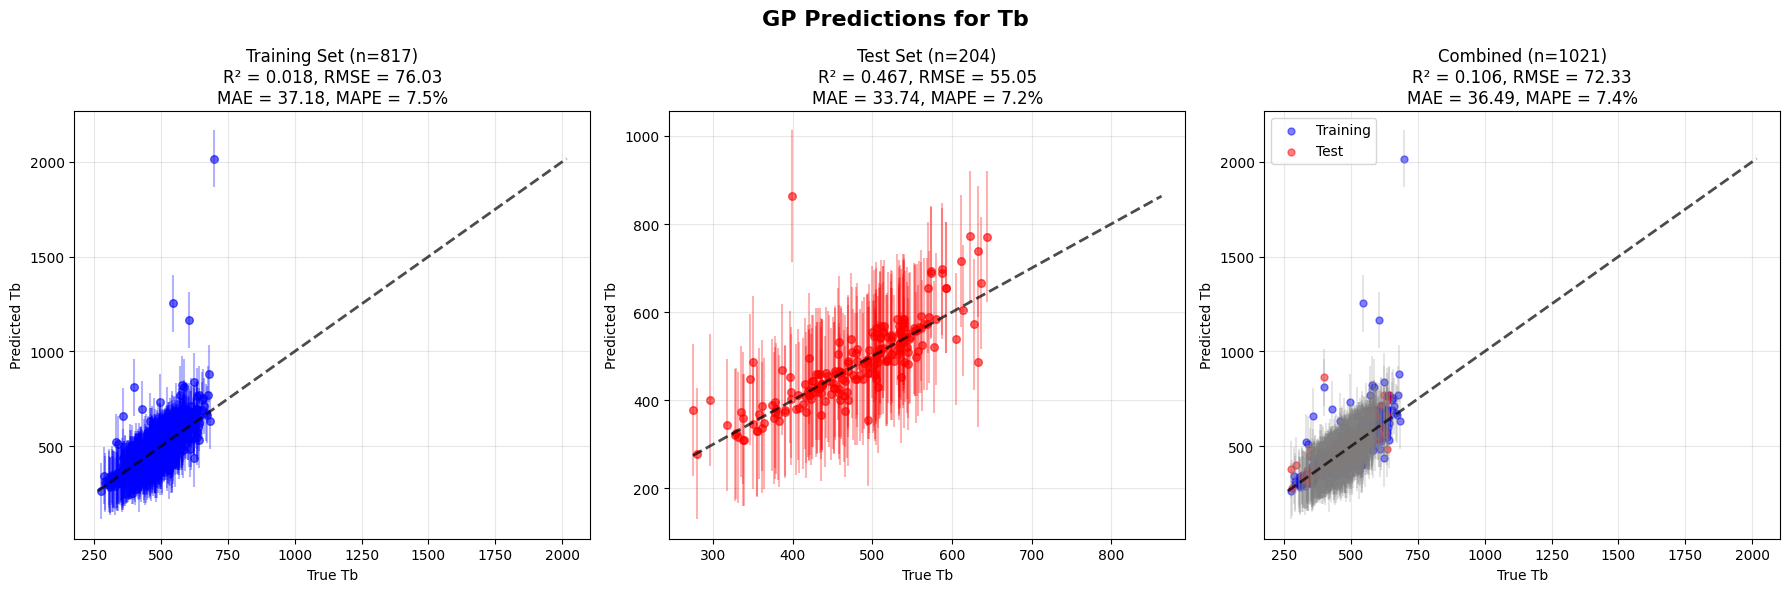


Confidence Interval Analysis for Tb:
Training: 17.0/817 (2.1%) outside 95% CI
Test: 1.0/204 (0.5%) outside 95% CI

Outlier Removal Summary for Tb:
Original samples: 1030
Outliers removed: 9 (0.9%)
Final samples used: 1021

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tb/model_2
Files created:
  - Tb_GP_results.png (side-by-side plots)
  - Tb_metrics.csv (metrics table with improvement)
  - Tb_summary.json (complete summary)
  - Tb_outliers_removed.csv (outlier details)
  - Tb_outlier_summary.txt (outlier summary)

✓ Tb completed successfully in 276.47 seconds

############################################################
PROCESSING 2/7: Tm
############################################################

PROCESSING PROPERTY: Tm
Original data shape: (1939, 5)
After removing rows with NaN in features/target: (1939, 5)
Loaded data for Tm: 1939 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, threshold=1.5):
  Origi

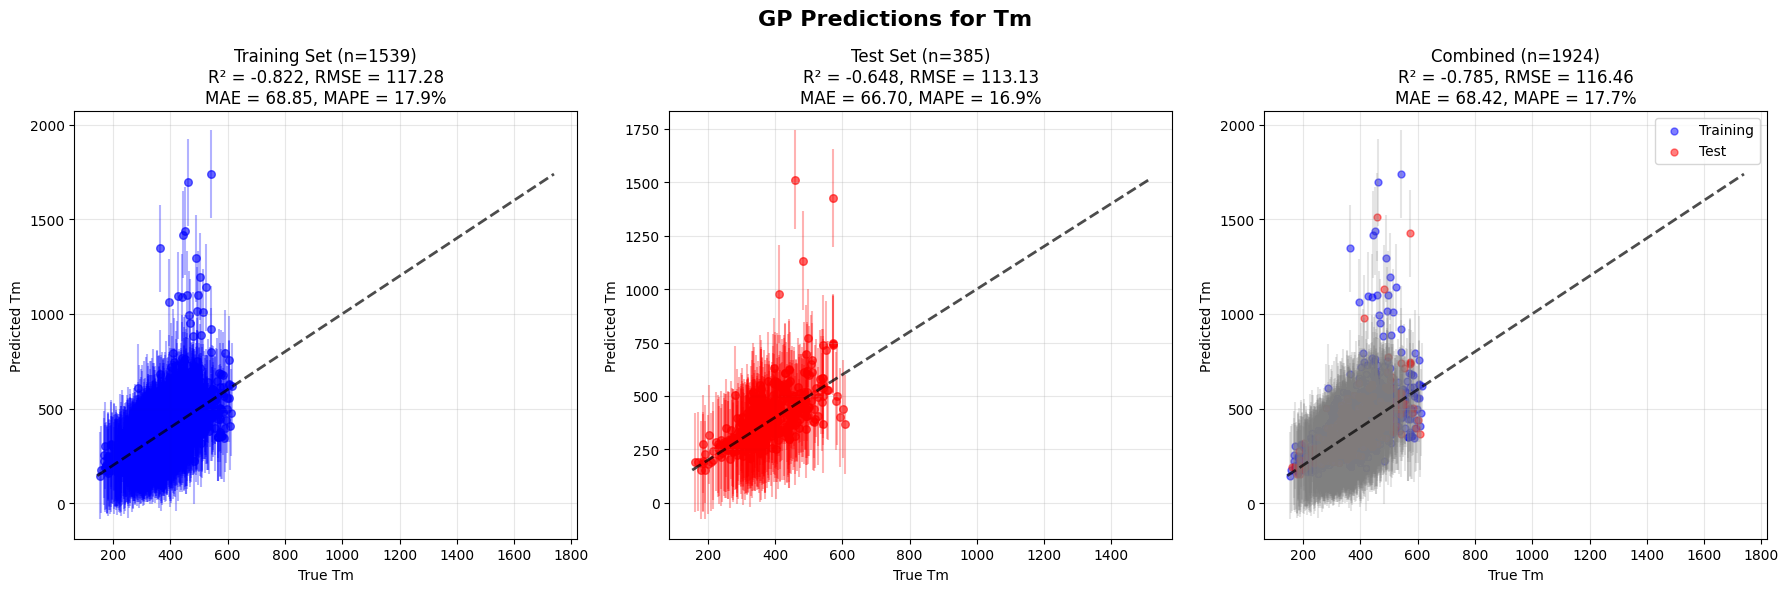


Confidence Interval Analysis for Tm:
Training: 46.0/1539 (3.0%) outside 95% CI
Test: 7.0/385 (1.8%) outside 95% CI

Outlier Removal Summary for Tm:
Original samples: 1939
Outliers removed: 15 (0.8%)
Final samples used: 1924

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tm/model_2
Files created:
  - Tm_GP_results.png (side-by-side plots)
  - Tm_metrics.csv (metrics table with improvement)
  - Tm_summary.json (complete summary)
  - Tm_outliers_removed.csv (outlier details)
  - Tm_outlier_summary.txt (outlier summary)

✓ Tm completed successfully in 1967.78 seconds

############################################################
PROCESSING 3/7: Pc
############################################################

PROCESSING PROPERTY: Pc
Original data shape: (75, 5)
After removing rows with NaN in features/target: (75, 5)
Loaded data for Pc: 75 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, threshold=1.5):
  Original

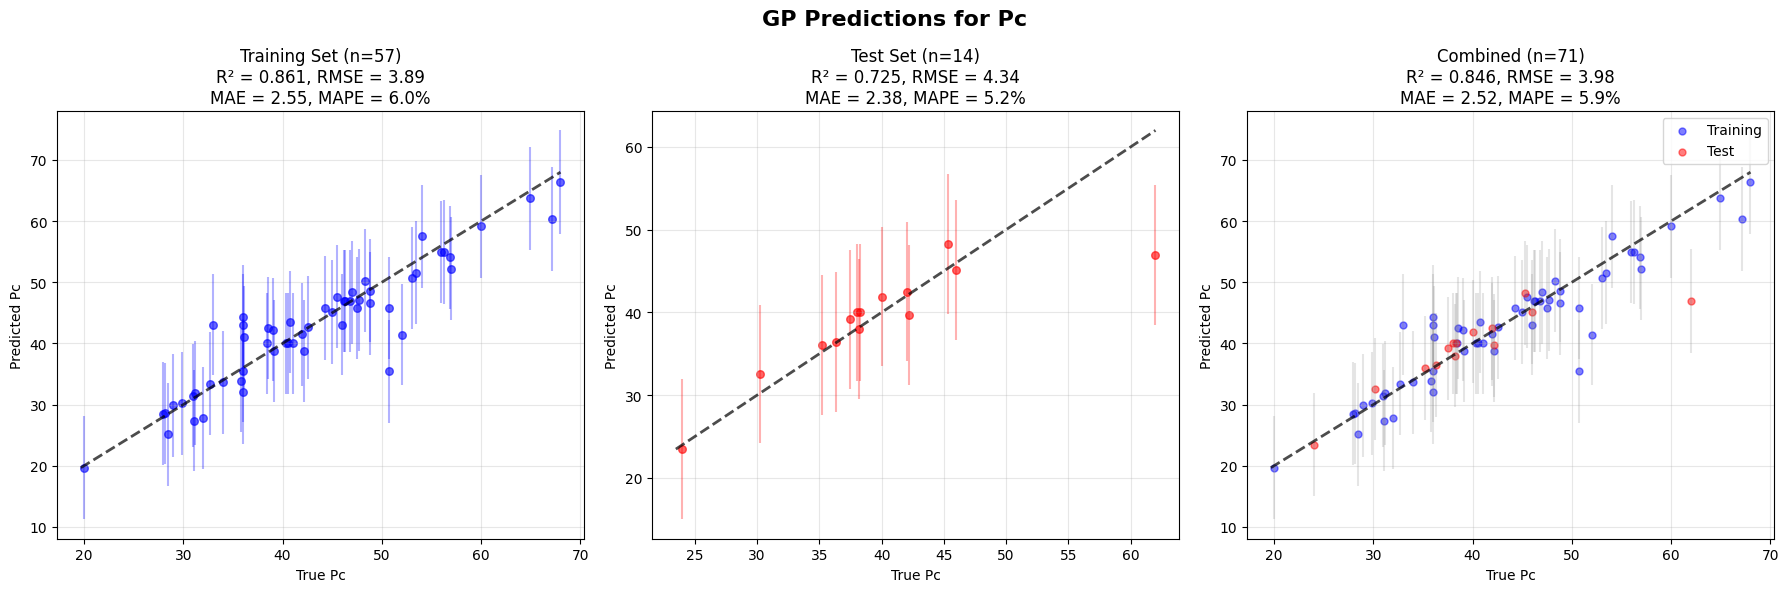


Confidence Interval Analysis for Pc:
Training: 3.0/57 (5.3%) outside 95% CI
Test: 1.0/14 (7.1%) outside 95% CI

Outlier Removal Summary for Pc:
Original samples: 75
Outliers removed: 4 (5.3%)
Final samples used: 71

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Pc/model_2
Files created:
  - Pc_GP_results.png (side-by-side plots)
  - Pc_metrics.csv (metrics table with improvement)
  - Pc_summary.json (complete summary)
  - Pc_outliers_removed.csv (outlier details)
  - Pc_outlier_summary.txt (outlier summary)

✓ Pc completed successfully in 14.27 seconds

############################################################
PROCESSING 4/7: Vc
############################################################

PROCESSING PROPERTY: Vc
Original data shape: (69, 5)
After removing rows with NaN in features/target: (69, 5)
Loaded data for Vc: 69 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, threshold=1.5):
  Original samples: 6

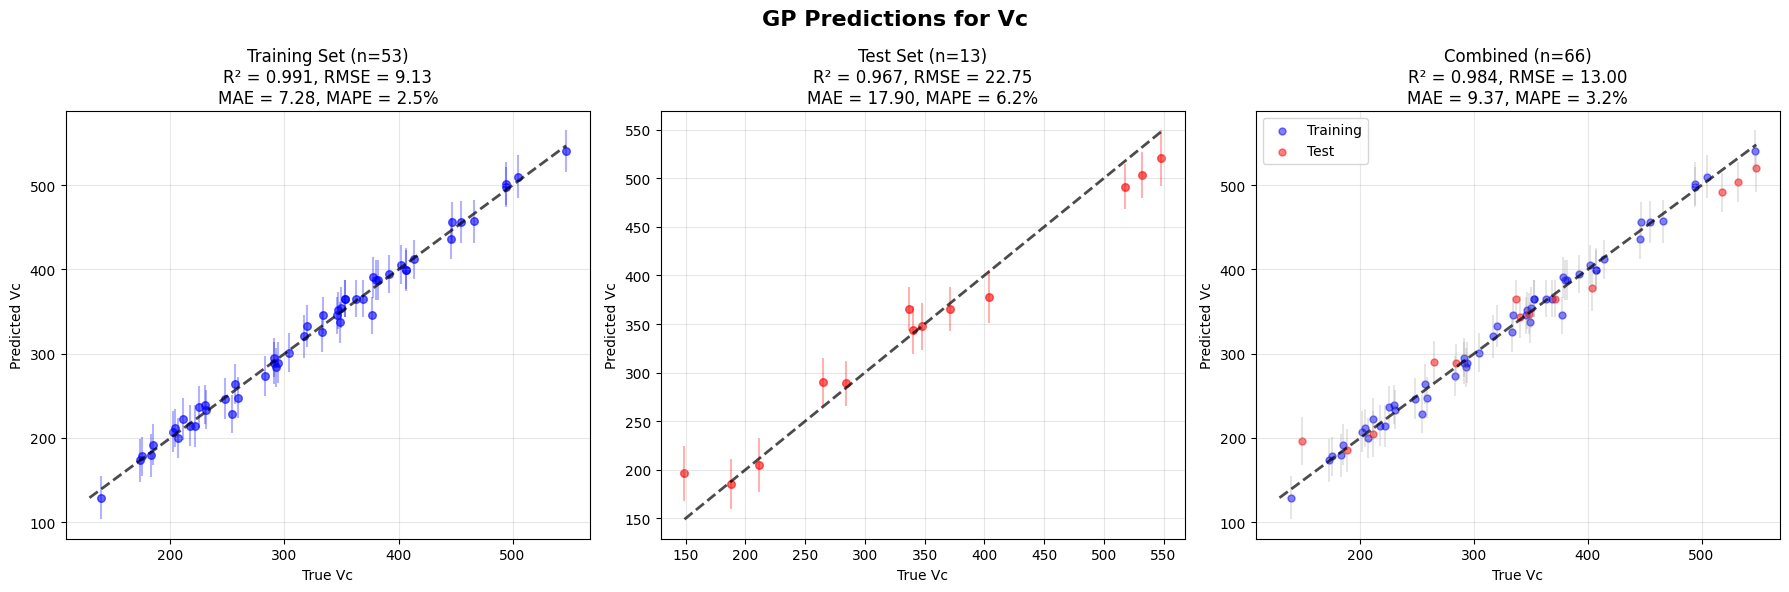


Confidence Interval Analysis for Vc:
Training: 2.0/53 (3.8%) outside 95% CI
Test: 5.0/13 (38.5%) outside 95% CI

Outlier Removal Summary for Vc:
Original samples: 69
Outliers removed: 3 (4.3%)
Final samples used: 66

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Vc/model_2
Files created:
  - Vc_GP_results.png (side-by-side plots)
  - Vc_metrics.csv (metrics table with improvement)
  - Vc_summary.json (complete summary)
  - Vc_outliers_removed.csv (outlier details)
  - Vc_outlier_summary.txt (outlier summary)

✓ Vc completed successfully in 13.83 seconds

############################################################
PROCESSING 5/7: Tc
############################################################

PROCESSING PROPERTY: Tc
Original data shape: (75, 5)
After removing rows with NaN in features/target: (75, 5)
Loaded data for Tc: 75 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, threshold=1.5):
  Original samples: 

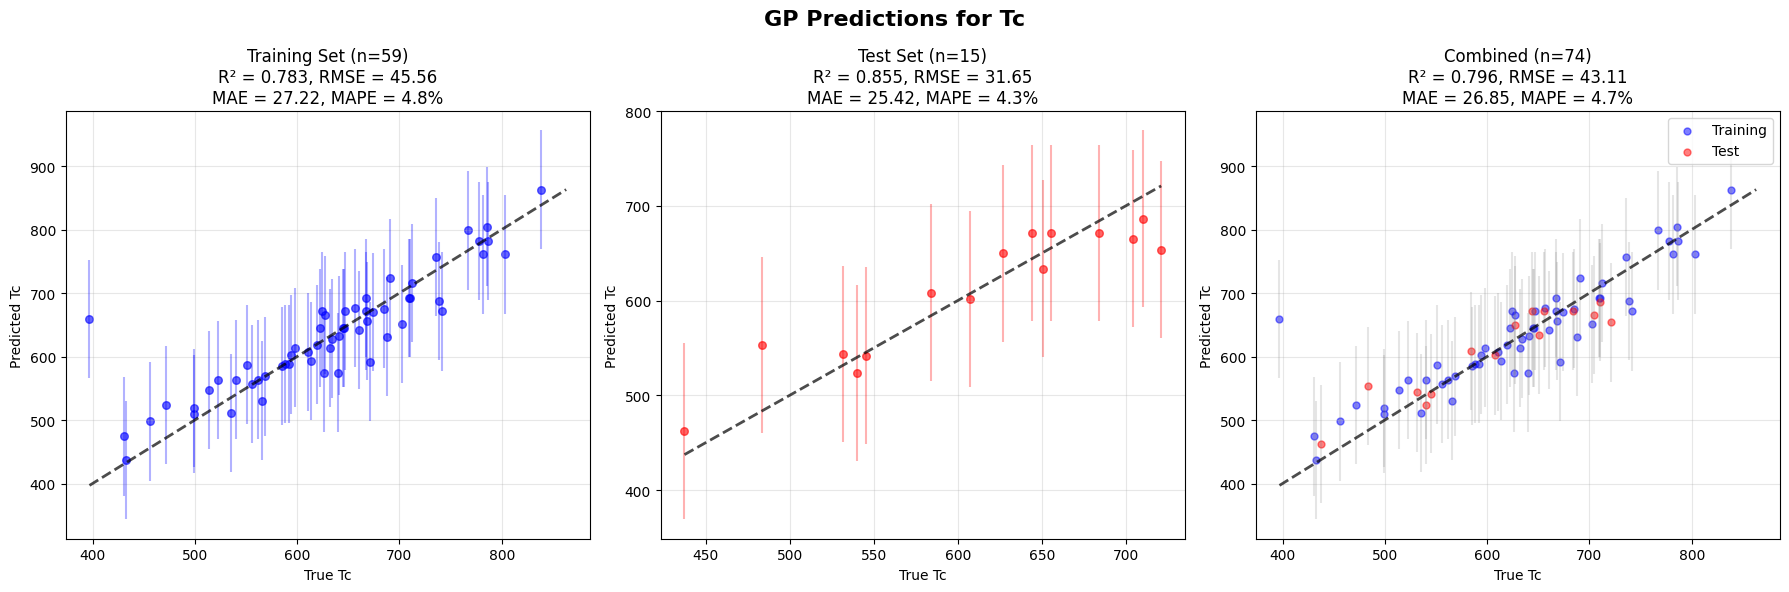


Confidence Interval Analysis for Tc:
Training: 1.0/59 (1.7%) outside 95% CI
Test: 0.0/15 (0.0%) outside 95% CI

Outlier Removal Summary for Tc:
Original samples: 75
Outliers removed: 1 (1.3%)
Final samples used: 74

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Tc/model_2
Files created:
  - Tc_GP_results.png (side-by-side plots)
  - Tc_metrics.csv (metrics table with improvement)
  - Tc_summary.json (complete summary)
  - Tc_outliers_removed.csv (outlier details)
  - Tc_outlier_summary.txt (outlier summary)

✓ Tc completed successfully in 15.86 seconds

############################################################
PROCESSING 6/7: Hvap
############################################################

PROCESSING PROPERTY: Hvap
Original data shape: (75, 5)
After removing rows with NaN in features/target: (75, 5)
Loaded data for Hvap: 75 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, threshold=1.5):
  Original samp

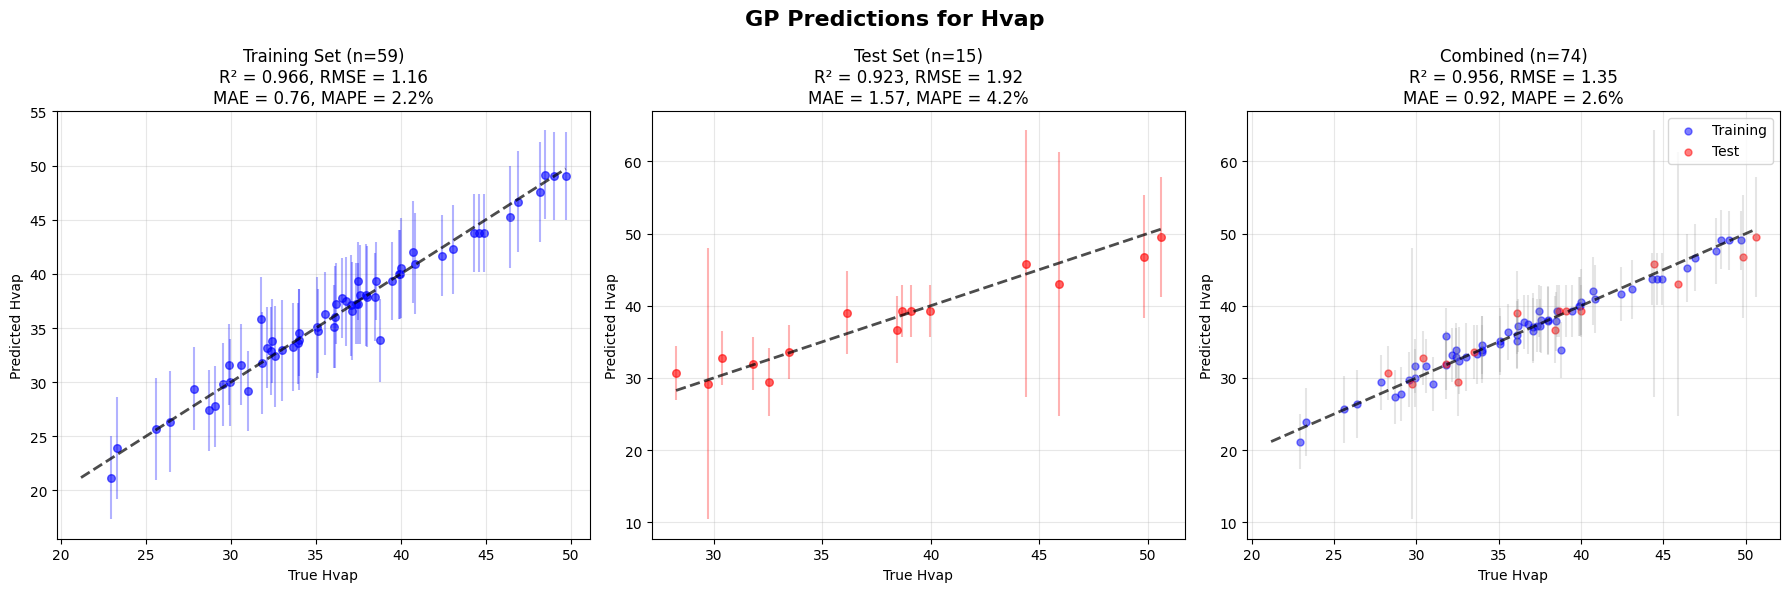


Confidence Interval Analysis for Hvap:
Training: 2.0/59 (3.4%) outside 95% CI
Test: 0.0/15 (0.0%) outside 95% CI

Outlier Removal Summary for Hvap:
Original samples: 75
Outliers removed: 1 (1.3%)
Final samples used: 74

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/Hvap/model_2
Files created:
  - Hvap_GP_results.png (side-by-side plots)
  - Hvap_metrics.csv (metrics table with improvement)
  - Hvap_summary.json (complete summary)
  - Hvap_outliers_removed.csv (outlier details)
  - Hvap_outlier_summary.txt (outlier summary)

✓ Hvap completed successfully in 14.29 seconds

############################################################
PROCESSING 7/7: logP
############################################################

PROCESSING PROPERTY: logP
Original data shape: (3536, 5)
After removing rows with NaN in features/target: (3463, 5)
Loaded data for logP: 3463 samples, 2 features

Applying outlier removal using iqr method (threshold=1.5)...
Outlier removal (iqr, thresho

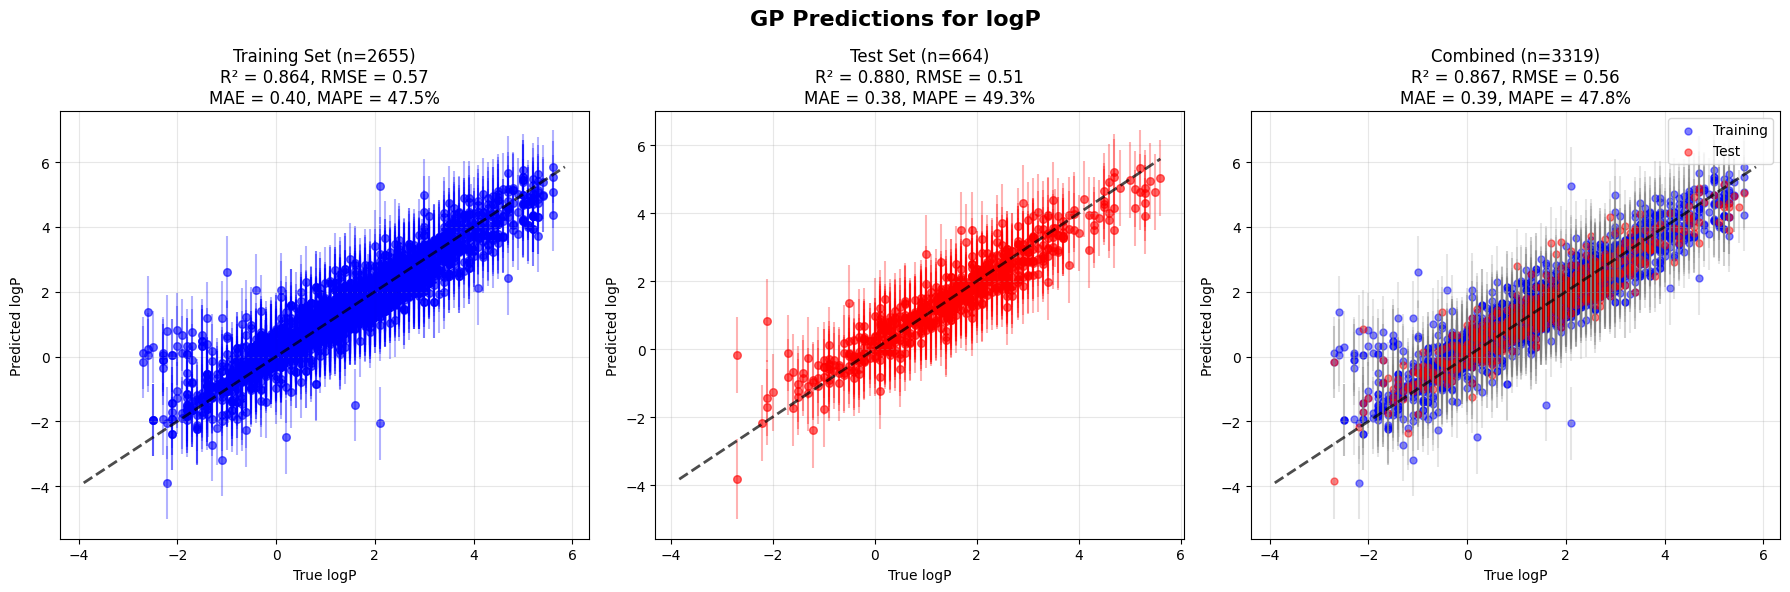


Confidence Interval Analysis for logP:
Training: 121.0/2655 (4.6%) outside 95% CI
Test: 23.0/664 (3.5%) outside 95% CI

Outlier Removal Summary for logP:
Original samples: 3463
Outliers removed: 144 (4.2%)
Final samples used: 3319

Results saved to: /content/drive/Shareddrives/GCCP/GCCP/Output_files/logP/model_2
Files created:
  - logP_GP_results.png (side-by-side plots)
  - logP_metrics.csv (metrics table with improvement)
  - logP_summary.json (complete summary)
  - logP_outliers_removed.csv (outlier details)
  - logP_outlier_summary.txt (outlier summary)

✓ logP completed successfully in 5453.34 seconds

AUTOMATION COMPLETE
Total time elapsed: 7755.83 seconds (129.3 minutes)
Successfully processed: 7/7 properties
Successful: ['Tb', 'Tm', 'Pc', 'Vc', 'Tc', 'Hvap', 'logP']

COMPREHENSIVE STATISTICAL METRICS TABLE - ALL PROPERTIES
Property                      Train                                                       Test                                                        Combin

In [ ]:
# -*- coding: utf-8 -*-
"""
Script to train a GP on physicochemical properties.
"""


import os
import warnings
import time

# Specific
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import gpflow
from gpflow.utilities import print_summary, set_trainable, deepcopy
import tensorflow as tf
from tensorflow_probability import bijectors as tfb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# =============================================================================
# Auxiliary Functions
# =============================================================================


def set_white_exp_95CI(code):
    """
    Sets the estimated average ~95% confidence interval on labels using the property code

    Parameters:
    code : string
        Property code

    Returns:
    exp_95CI : float
    """
    if code == 'Tb':
        exp_95CI = 10.0
    elif code == 'Tm':
        exp_95CI = 5.0
    elif code == 'Hvap':
        exp_95CI = 1.0
    elif code == 'Vc':
        exp_95CI = 25.0
    elif code == 'Tc':
        exp_95CI = 5.0
    elif code == 'Pc':
        exp_95CI = 30.0
    elif code == 'logP':
        exp_95CI = 1.0
    return exp_95CI



def gpConfig_from_method(method_number, code, kernel = 'RBF', anisotropic = False, useWhiteKernel = True, trainLikelihood = True, opt_method = 'L-BFGS-B'):
    """
    Creates a gpConfig dictionary based on the method number.

    Parameters:
    method_number : int
        Method number.

    Returns:
    gpConfig : dictionary
        Dictionary of GP configuration parameters.

    Note:
    method_number is used to define which type of gp model to use
    1: Y = GP(0, K(Mw, Y_gc))
    2: Y - Y_gc = GP(0, K(Mw))
    3: Y - Y_gc = GP(0, K(Mw, Y_gc))
    4: Y = GP(Y_gc, K(Mw, Y_gc))
    5: Y = GP(AMw + BY_gc + c, K(Mw, Y_gc))
    """
    gpConfig={'kernel': kernel,
           'useWhiteKernel':useWhiteKernel,
           'trainLikelihood':trainLikelihood,
           'opt_method':opt_method,
           'anisotropic':anisotropic}
    if method_number == 1:
        gpConfig['mean_function']='Zero'
        gpConfig['Name']='y_exp = GP(0, K(x1,x2))'
        gpConfig['SaveName']='model_1'
    if method_number == 2:
        gpConfig['mean_function']='Zero'
        gpConfig['Name']='y_exp = y_GC + GP(0, K(x1))'
        gpConfig['SaveName']='model_2'
    if method_number == 3:
        gpConfig['mean_function']='Constant'
        gpConfig['Name']='y_exp = GP(y_GC, K(x1,x2))'
        gpConfig['SaveName']='model_3'
    if method_number == 4:
        gpConfig['mean_function']='Linear'
        gpConfig['Name']='y_exp = GP(B@X, K(x1,x2))'
        gpConfig['SaveName']='model_4'
    else:
        if method_number not in [1 , 2, 3, 4]:
            raise ValueError('invalid method number input')
    return gpConfig


def get_gp_data(X, Y, method_number):
    """
    Gets X and Y data to train GP based on the method number

    Parameters:
    X : numpy array
        Features data.
    Y : numpy array
        Property data.
    method_number : int
        Method number

    Returns:
    X_gp : numpy array
        Features data to train GP.
    Y_gp: numpy array
        Data to train GP.
    Y_gc: numpy array
        Data from Joback method
    """
    if method_number == 2:
        X_gp = X[:,0].reshape(-1,1)
    else:
        X_gp = X
    if method_number == 2:
        Y_gp = Y - X[:,1]
    else:
        Y_gp = Y
    Y_gp = Y_gp.reshape(-1,1)
    Y_gc = X[:,1].reshape(-1,1)
    return X_gp, Y_gp, Y_gc


def discrepancy_to_property(method_number, y_pred, y_gc, idx):
    """
    Adds discrepancy to property based on the method number
    Parameters:
    method_number : int
        Method number
    y_pred : numpy array
        GP predicted output
    y_gc : numpy array
        Predicted GC method results
    idx : np.array
        Index of the y_gc to be added to y_pred

    Returns:
    y_prop : numpy array
        Predicted property value
    """
    if method_number == 2:
        y_prop = y_pred + y_gc[idx.flatten(),:]
    else:
        y_prop = y_pred
    return y_prop

def stratifyvector(Y):
    """
    Creates a stratified vector based on the label data Y

    Parameters:
    Y : numpy array
        label data
    Returns:
    stratifyVector : numpy array
        Stratified vector
    """
    # Iterate over number of bins, trying to find the larger number of bins that
    # guarantees at least 5 values per bin
    for n in range(1,100):
        # Bin Y using n bins
        stratifyVector=pd.cut(Y,n,labels=False)
        # Define isValid (all bins have at least 5 values)
        isValid=True
        # Check that all bins have at least 5 values
        for k in range(n):
            if np.count_nonzero(stratifyVector==k)<5:
                isValid=False
        #If isValid is false, n is too large; nBins must be the previous iteration
        if not isValid:
            nBins=n-1
            break
    # Generate vector for stratified splitting based on labels
    stratifyVector=pd.cut(Y,nBins,labels=False)
    return stratifyVector

def normalize(inputArray,skScaler=None,method='Standardization',reverse=False):
    """
    normalize() normalizes (or unnormalizes) inputArray using the method
    specified and the skScaler provided.

    Parameters
    ----------
    inputArray : numpy array
        Array to be normalized. If dim>1, array is normalized column-wise.
    skScaler : scikit-learn preprocessing object or None
        Scikit-learn preprocessing object previosly fitted to data. If None,
        the object is fitted to inputArray.
        Default: None
    method : string, optional
        Normalization method to be used.
        Methods available:
            . Standardization - classic standardization, (x-mean(x))/std(x)
            . MinMax - scale to range (0,1)
            . LogStand - standardization on the log of the variable,
                         (log(x)-mean(log(x)))/std(log(x))
            . Log+bStand - standardization on the log of variables that can be
                           zero; uses a small buffer,
                           (log(x+b)-mean(log(x+b)))/std(log(x+b))
        Default: 'Standardization'
    reverse : bool
        Whether  to normalize (False) or unnormalize (True) inputArray.
        Defalt: False

    Returns
    -------
    inputArray : numpy array
        Normalized (or unnormalized) version of inputArray.
    skScaler : scikit-learn preprocessing object
        Scikit-learn preprocessing object fitted to inputArray. It is the same
        as the inputted skScaler, if it was provided.

    """
    # If inputArray is a labels vector of size (N,), reshape to (N,1)
    if inputArray.ndim==1:
        inputArray=inputArray.reshape((-1,1))
        warnings.warn('Input to normalize() was of shape (N,). It was assumed'\
                      +' to be a column array and converted to a (N,1) shape.')
    # If skScaler is None, train for the first time
    if method == 'None':
        inputArray=inputArray
        skScaler = None
    else:
        if skScaler is None:
            # Check method
            if method=='Standardization' or method=='MinMax': aux=inputArray
            elif method=='LogStand': aux=np.log(inputArray)
            elif method=='Log+bStand': aux=np.log(inputArray+10**-3)
            else: raise ValueError('Could not recognize method in normalize().')
            if method!='MinMax':
                skScaler=preprocessing.StandardScaler().fit(aux)
            else:
                skScaler=preprocessing.MinMaxScaler().fit(aux)
        # Do main operation (normalize or unnormalize)
        if reverse:
            # Rescale the data back to its original distribution
            inputArray=skScaler.inverse_transform(inputArray)
            # Check method
            if method=='LogStand': inputArray=np.exp(inputArray)
            elif method=='Log+bStand': inputArray=np.exp(inputArray)-10**-3
        elif not reverse:
            # Check method
            if method=='Standardization' or method=='MinMax': aux=inputArray
            elif method=='LogStand': aux=np.log(inputArray)
            elif method=='Log+bStand': aux=np.log(inputArray+10**-3)
            else: raise ValueError('Could not recognize method in normalize().')
            inputArray=skScaler.transform(aux)
    # Return
    return inputArray,skScaler



# Build GPR model function with bounded hyperparameters
def build_model_with_bounded_params(X, Y, kern, low, high, \
                                    high_alpha, init_val1, init_val2, init_val3, \
                                    useWhite, trainLikelihood, anisotropic, typeMeanFunc):
    """
    build_model_with_bounded_params(*) creates a GP model object with bounded hyperparameters and initial
    values

    Parameters
    ----------
    X : numpy array
        Feature data
    Y : numpy array
        Label data
    low : float
        lower bound on all hyperparameters
    high : float
        upper bound on all hyperparameters except alpha for the RQ kernel
    high_alpha : float
        upper bound on alpha hyperparameter for the RQ kernel
    init_val1 : float
        initial values for first length scale and alpha parameter
    init_val2 : float
        initial values for second length scale for anisotropic kernels
        for isotropic kernels, only one initial value (init_val1) is used
    init_val1 : float
        initial values for variance or scale hyperparameter of kernel 1 (not Whitenoise kernel)

    Returns
    -------
    model : Gpflow model object
        GP model object with bounded hyperparameters and initial values

    """

    low = tf.cast(low, dtype=tf.float64)
    high = tf.cast(high, dtype=tf.float64)
    high_alpha = tf.cast(high_alpha, dtype=tf.float64)
    init_val1 = tf.cast(init_val1, dtype=tf.float64)
    init_val2 = tf.cast(init_val2, dtype=tf.float64)
    init_val3 = tf.cast(init_val3, dtype=tf.float64)
    if anisotropic == True:
        lsc = gpflow.Parameter([init_val1, init_val2], transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    else:
        lsc = gpflow.Parameter(init_val1, transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    alf = gpflow.Parameter(init_val1, transform=tfb.Sigmoid(low , high_alpha), dtype=tf.float64)
    var = gpflow.Parameter(init_val3, transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    if kern == "RQ":
        kernel_ = gpflow.kernels.RationalQuadratic()
        kernel_.alpha = alf
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "RBF":
        kernel_ = gpflow.kernels.RBF()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern12":
        kernel_ = gpflow.kernels.Matern12()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern32":
        kernel_ = gpflow.kernels.Matern32()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern52":
        kernel_ = gpflow.kernels.Matern52()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    if useWhite == True:
        #white_var = np.array(np.random.uniform(0.05, 1.0))
        final_kernel = kernel_+gpflow.kernels.White(variance=1.0)
    else:
        final_kernel = kernel_

    if typeMeanFunc == 'Zero':
        mf = None
    if typeMeanFunc == 'Constant':
        #If constant value is selected but no value is given, default to zero mean
        mf_val = np.array([0,1]).reshape(-1,1)
        mf = gpflow.functions.Linear(mf_val)
    if typeMeanFunc == 'Linear':
        A = np.ones((X.shape[1],1))
        mf = gpflow.functions.Linear(A)
    model_ = gpflow.models.GPR(data=(X, Y), kernel=final_kernel, mean_function=mf, noise_variance=10**-5)
    if typeMeanFunc == 'Constant':
        gpflow.set_trainable(model_.mean_function.A, False)
        gpflow.set_trainable(model_.mean_function.b, False)
    gpflow.utilities.set_trainable(model_.likelihood.variance,trainLikelihood)
    model = model_
    return model



def buildGP(X_Train, Y_Train, gpConfig, code, featurenorm, retrain_count):
    """
    buildGP() builds and fits a GP model using the training data provided.

    Parameters
    ----------
    X_Train : numpy array (N,K)
        Training features, where N is the number of data points and K is the
        number of independent features
    Y_Train : numpy array (N,1)
        Training labels (e.g., property of a given molecule).
    gpConfig : dictionary, optional
        Dictionary containing the configuration of the GP. If a key is not
        present in the dictionary, its default value is used.
        Keys:
            . kernel : string
                Kernel to be used. One of:
                    . 'RBF' - gpflow.kernels.RBF()
                    . 'RQ' - gpflow.kernels.RationalQuadratic()
                    . 'Matern12' - gpflow.kernels.Matern12()
                    . 'Matern32' - gpflow.kernels.Matern32()
                    . 'Matern52' - gpflow.kernels.Matern52()
                The default is 'RQ'.
            . useWhiteKernel : boolean
                Whether to use a White kernel (gpflow.kernels.White).
                The default is True.
            . trainLikelihood : boolean
                Whether to treat the variance of the likelihood of the modeal
                as a trainable (or fitting) parameter. If False, this value is
                fixed at 10^-5.
                The default is True.
        The default is {}.
    sc_y_scale : Scikit learn standard scaler object
        standard scaler fitted on label training data
    retrain_count : int
        Current GP retrain number

    """
    # Unpack gpConfig
    kernel=gpConfig.get('kernel','RQ')
    useWhiteKernel=gpConfig.get('useWhiteKernel','True')
    trainLikelihood=gpConfig.get('trainLikelihood','True')
    typeMeanFunc=gpConfig.get('mean_function','Zero')
    opt_method=gpConfig.get('opt_method','L-BFGS-B')
    anisotropy=gpConfig.get('anisotropic','False')

    seed_ = int(retrain_count) * 100
    np.random.seed(seed_)
    tf.random.set_seed(seed_)

    if retrain_count == 0:
        init_val1 = 1
        init_val2 = 1
        init_val3 = 1
    else:
        init_val1 = np.array(np.random.uniform(0, 100))
        init_val2 = np.array(np.random.uniform(0, 100))
        init_val3 = np.array(np.random.lognormal(0, 1.0))

    model = build_model_with_bounded_params(X_Train, Y_Train, kernel, 0.00001, 100, 5000, init_val1, \
                            init_val2, init_val3, useWhiteKernel, trainLikelihood, anisotropy, typeMeanFunc)
    model_pretrain = deepcopy(model)
    # print(gpflow.utilities.print_summary(model))
    condition_number = np.linalg.cond(model.kernel(X_Train))
    # Build optimizer
    optimizer=gpflow.optimizers.Scipy()
    # Fit GP to training data
    aux=optimizer.minimize(model.training_loss,
                           model.trainable_variables,
                           options={'maxiter':10**9},
                           method=opt_method)
    obj_func = model.training_loss()
    if aux.success:
        opt_success = True
    else:
        opt_success = False

    return model, aux, condition_number, obj_func, opt_success, retrain_count, model_pretrain



def train_gp(X_Train, Y_Train, gpConfig, code, sc_y, featurenorm, retrain_GP, retrain_count):
    """
    Trains the GP given training data.


    """

    # Train the model multiple times and keep track of the model with the lowest minimum training loss
    best_minimum_loss = float('inf')
    best_model = None
    best_model_pretrain = None
    best_model_success = False
    best_condition_num = float('inf')
    args = (X_Train, Y_Train, gpConfig)

    retrain_GP = int(retrain_GP)
    retrain_count = retrain_count
    for i in range(retrain_GP):
        model, aux, condition_number, obj_func, opt_success, retrain_count, model_pretrain = \
            buildGP(X_Train, Y_Train, gpConfig, code, featurenorm, retrain_count)
        print(f"training_loss = {obj_func}")
        print(f"condition_number = {condition_number}")
        retrain_count += 1
        if best_minimum_loss > obj_func and opt_success==True:
            best_minimum_loss = obj_func
            best_model = model
            best_model_pretrain = model_pretrain
            best_model_success = opt_success
            best_condition_num = condition_number
    if best_model_success == False:
        warnings.warn('GP optimizer failed to converge with retrains')

    #Put hyperparameters in a list
    trained_hyperparams = gpflow.utilities.read_values(best_model)

    if sc_y != None:
        sc_y_scale = sc_y.scale_
    else:
        sc_y_scale = None

    return best_model,best_minimum_loss,best_model_success,best_condition_num,trained_hyperparams,best_model_pretrain,sc_y_scale


def gpPredict(model,X):
    """
    gpPredict() returns the prediction and variance of the GP model
    on the X data provided.

    Parameters
    ----------
    model : gpflow.models.gpr.GPR object
        GP model.
    X : numpy array (N,K)
        Training features, where N is the number of data points and K is the
        number of independent features (e.g., sigma profile bins).

    Returns
    -------
    Y : numpy array (N,1)
        GP predictions.
    STD : numpy array (N,1)
        GP standard deviations.

    """
    # Do GP prediction, obtaining mean and variance
    GP_Mean,GP_Var=model.predict_f(X)
    # Convert to numpy
    GP_Mean=GP_Mean.numpy()
    GP_Var=GP_Var.numpy()
    # Prepare outputs
    Y=GP_Mean
    VAR=GP_Var
    # Output
    return Y,VAR




def count_outside_95(Y_Train, Y_Test, Y_Train_Pred, Y_Test_Pred, Y_Train_CI, Y_Test_CI):
    """
    count_outside_95() finds the number and fraction of predicted data that are outside the predicted 95%
        confidence intervals from the true values

    Parameters:
    Y_Train_CI : numpy array
        Absolute values of the 95% confidence interval on the predictions on training set
    Y_Test_CI : numpy array
        Absolute values of the 95% confidence interval on the predictions on testing set

    """
    out_95_train = []
    out_95_test = []
    for index, value in enumerate(Y_Train):
        if np.abs(value - Y_Train_Pred[index]) > Y_Train_CI[index]:
            out_95_train.append(index)
    num_out95_train = len(out_95_train)
    frac_out95_train = num_out95_train/len(Y_Train)
    for index, value in enumerate(Y_Test):
        if np.abs(value - Y_Test_Pred[index]) > Y_Test_CI[index]:
            out_95_test.append(index)
    num_out95_test = len(out_95_test)
    frac_out95_test = num_out95_test/len(Y_Test)

    return num_out95_train, frac_out95_train, num_out95_test, frac_out95_test


# =============================================================================
# Statistical Metrics and Plotting Functions
# =============================================================================
def calculate_metrics(y_true, y_pred):
    """Calculate comprehensive statistical metrics"""
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # MAPE and MPE with zero-division protection
    mask = y_true != 0
    if mask.sum() > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        mpe = np.mean((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
    else:
        mape = np.inf
        mpe = np.inf

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'MPE': mpe}

def calculate_improvement(train_metrics, test_metrics):
    """Calculate improvement metrics (positive values indicate overfitting)"""
    improvement = {}

    # For R2: higher is better, so improvement = train - test
    improvement['R2'] = train_metrics['R2'] - test_metrics['R2']

    # For error metrics: lower is better, so improvement = test - train
    improvement['MAE'] = test_metrics['MAE'] - train_metrics['MAE']
    improvement['RMSE'] = test_metrics['RMSE'] - train_metrics['RMSE']
    improvement['MAPE'] = test_metrics['MAPE'] - train_metrics['MAPE']
    improvement['MPE'] = test_metrics['MPE'] - train_metrics['MPE']

    return improvement

def plot_predictions(Y_train_true, Y_train_pred, Y_test_true, Y_test_pred,
                    Y_train_ci, Y_test_ci, property_name, save_path):
    """Create side-by-side parity plots: Train, Test, and Combined"""

    # Set style
    plt.style.use('default')
    sns.set_palette("husl")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'GP Predictions for {property_name}', fontsize=16, fontweight='bold')

    # Flatten arrays
    y_train_true_flat = Y_train_true.flatten()
    y_train_pred_flat = Y_train_pred.flatten()
    y_train_ci_flat = Y_train_ci.flatten()
    y_test_true_flat = Y_test_true.flatten()
    y_test_pred_flat = Y_test_pred.flatten()
    y_test_ci_flat = Y_test_ci.flatten()

    # Calculate metrics
    train_metrics = calculate_metrics(y_train_true_flat, y_train_pred_flat)
    test_metrics = calculate_metrics(y_test_true_flat, y_test_pred_flat)

    # Combined data for the third plot
    y_combined_true = np.concatenate([y_train_true_flat, y_test_true_flat])
    y_combined_pred = np.concatenate([y_train_pred_flat, y_test_pred_flat])
    y_combined_ci = np.concatenate([y_train_ci_flat, y_test_ci_flat])
    combined_metrics = calculate_metrics(y_combined_true, y_combined_pred)

    # Plot 1: Training Set
    ax1 = axes[0]
    # Changed: True on x-axis, Predicted on y-axis
    ax1.scatter(y_train_true_flat, y_train_pred_flat, alpha=0.6, s=30, color='blue')
    ax1.errorbar(y_train_true_flat, y_train_pred_flat, yerr=y_train_ci_flat,
                fmt='none', alpha=0.3, color='blue')

    min_val = min(y_train_true_flat.min(), y_train_pred_flat.min())
    max_val = max(y_train_true_flat.max(), y_train_pred_flat.max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

    ax1.set_title(f'Training Set (n={len(y_train_true_flat)})\n'
                  f'R² = {train_metrics["R2"]:.3f}, RMSE = {train_metrics["RMSE"]:.2f}\n'
                  f'MAE = {train_metrics["MAE"]:.2f}, MAPE = {train_metrics["MAPE"]:.1f}%')
    ax1.set_xlabel(f'True {property_name}')        # Changed: True on x-axis
    ax1.set_ylabel(f'Predicted {property_name}')   # Changed: Predicted on y-axis
    ax1.grid(True, alpha=0.3)

    # Plot 2: Test Set
    ax2 = axes[1]
    # Changed: True on x-axis, Predicted on y-axis
    ax2.scatter(y_test_true_flat, y_test_pred_flat, alpha=0.6, s=30, color='red')
    ax2.errorbar(y_test_true_flat, y_test_pred_flat, yerr=y_test_ci_flat,
                fmt='none', alpha=0.3, color='red')

    min_val = min(y_test_true_flat.min(), y_test_pred_flat.min())
    max_val = max(y_test_true_flat.max(), y_test_pred_flat.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

    ax2.set_title(f'Test Set (n={len(y_test_true_flat)})\n'
                  f'R² = {test_metrics["R2"]:.3f}, RMSE = {test_metrics["RMSE"]:.2f}\n'
                  f'MAE = {test_metrics["MAE"]:.2f}, MAPE = {test_metrics["MAPE"]:.1f}%')
    ax2.set_xlabel(f'True {property_name}')        # Changed: True on x-axis
    ax2.set_ylabel(f'Predicted {property_name}')   # Changed: Predicted on y-axis
    ax2.grid(True, alpha=0.3)

    # Plot 3: Combined Train + Test Set
    ax3 = axes[2]
    # Changed: True on x-axis, Predicted on y-axis
    ax3.scatter(y_train_true_flat, y_train_pred_flat, alpha=0.5, s=25, color='blue', label='Training')
    ax3.scatter(y_test_true_flat, y_test_pred_flat, alpha=0.5, s=25, color='red', label='Test')
    ax3.errorbar(y_combined_true, y_combined_pred, yerr=y_combined_ci,
                fmt='none', alpha=0.2, color='gray')

    min_val = min(y_combined_true.min(), y_combined_pred.min())
    max_val = max(y_combined_true.max(), y_combined_pred.max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

    ax3.set_title(f'Combined (n={len(y_combined_true)})\n'
                  f'R² = {combined_metrics["R2"]:.3f}, RMSE = {combined_metrics["RMSE"]:.2f}\n'
                  f'MAE = {combined_metrics["MAE"]:.2f}, MAPE = {combined_metrics["MAPE"]:.1f}%')
    ax3.set_xlabel(f'True {property_name}')        # Changed: True on x-axis
    ax3.set_ylabel(f'Predicted {property_name}')   # Changed: Predicted on y-axis
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    plt.tight_layout()
    plt.savefig(f"{save_path}/{property_name}_GP_results.png", dpi=300, bbox_inches='tight')
    plt.show()

    return train_metrics, test_metrics, combined_metrics



# =============================================================================
# Outlier Detection and Removal Functions
# =============================================================================
def detect_outliers_iqr(data, multiplier=1.5):
    """
    Detect outliers using Interquartile Range (IQR) method

    Parameters:
    data : numpy array
        1D array of data values
    multiplier : float
        IQR multiplier (1.5 is standard, 3.0 is more conservative)

    Returns:
    outlier_mask : numpy array
        Boolean mask where True indicates outlier
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    outlier_mask = (data < lower_bound) | (data > upper_bound)
    return outlier_mask

def detect_outliers_zscore(data, threshold=3.0):
    """
    Detect outliers using Z-score method

    Parameters:
    data : numpy array
        1D array of data values
    threshold : float
        Z-score threshold (3.0 is standard)

    Returns:
    outlier_mask : numpy array
        Boolean mask where True indicates outlier
    """
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outlier_mask = z_scores > threshold
    return outlier_mask

def detect_outliers_modified_zscore(data, threshold=3.5):
    """
    Detect outliers using Modified Z-score method (more robust)

    Parameters:
    data : numpy array
        1D array of data values
    threshold : float
        Modified Z-score threshold (3.5 is standard)

    Returns:
    outlier_mask : numpy array
        Boolean mask where True indicates outlier
    """
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    outlier_mask = np.abs(modified_z_scores) > threshold
    return outlier_mask

def remove_outliers(X, Y, method='iqr', threshold=1.5, verbose=True):
    """
    Remove outliers from the dataset based on target variable Y

    Parameters:
    X : numpy array
        Feature matrix
    Y : numpy array
        Target values
    method : str
        Outlier detection method ('iqr', 'zscore', 'modified_zscore')
    threshold : float
        Threshold parameter for outlier detection
    verbose : bool
        Whether to print outlier removal statistics

    Returns:
    X_clean : numpy array
        Feature matrix with outliers removed
    Y_clean : numpy array
        Target values with outliers removed
    outlier_info : dict
        Information about outlier removal
    """
    Y_flat = Y.flatten()

    # Detect outliers
    if method == 'iqr':
        outlier_mask = detect_outliers_iqr(Y_flat, multiplier=threshold)
    elif method == 'zscore':
        outlier_mask = detect_outliers_zscore(Y_flat, threshold=threshold)
    elif method == 'modified_zscore':
        outlier_mask = detect_outliers_modified_zscore(Y_flat, threshold=threshold)
    else:
        raise ValueError(f"Unknown outlier detection method: {method}")

    # Create clean datasets
    clean_mask = ~outlier_mask
    X_clean = X[clean_mask]
    Y_clean = Y[clean_mask]

    # Calculate statistics
    n_original = len(Y_flat)
    n_outliers = np.sum(outlier_mask)
    n_clean = len(Y_clean)
    outlier_percentage = (n_outliers / n_original) * 100

    outlier_info = {
        'method': method,
        'threshold': threshold,
        'n_original': n_original,
        'n_outliers': n_outliers,
        'n_clean': n_clean,
        'outlier_percentage': outlier_percentage,
        'outlier_indices': np.where(outlier_mask)[0],
        'outlier_values': Y_flat[outlier_mask]
    }

    if verbose:
        print(f"Outlier removal ({method}, threshold={threshold}):")
        print(f"  Original samples: {n_original}")
        print(f"  Outliers detected: {n_outliers} ({outlier_percentage:.1f}%)")
        print(f"  Clean samples: {n_clean}")
        if n_outliers > 0:
            print(f"  Outlier range: [{np.min(Y_flat[outlier_mask]):.2f}, {np.max(Y_flat[outlier_mask]):.2f}]")

    return X_clean, Y_clean, outlier_info

def process_single_property(code, kernel, anisotropic, opt_method, useWhiteKernel,
                          trainLikelihood, retrain_GP, method_number, outputDir,
                          modelBuildingDataDir, seed=42,
                          remove_outliers_flag=True, outlier_method='iqr', outlier_threshold=1.5):
    """
    Process a single property code with optional outlier removal

    Parameters:
    -----------
    code : str
        Property code (e.g., 'Tb', 'Tm', etc.)
    kernel : str
        Kernel type for GP
    anisotropic : bool
        Whether to use anisotropic kernel
    opt_method : str
        Optimization method
    useWhiteKernel : bool
        Whether to use white noise kernel
    trainLikelihood : bool
        Whether to train likelihood variance
    retrain_GP : int
        Number of GP retraining attempts
    method_number : int
        Method number for GP configuration
    outputDir : str
        Output directory path
    modelBuildingDataDir : str
        Model building data directory path
    seed : int
        Random seed for reproducibility
    remove_outliers_flag : bool
        Whether to remove outliers before training
    outlier_method : str
        Outlier detection method ('iqr', 'zscore', 'modified_zscore')
    outlier_threshold : float
        Threshold for outlier detection

    Returns:
    --------
    dict or None
        Results summary dictionary or None if processing failed
    """

    print(f"\n{'='*80}")
    print(f"PROCESSING PROPERTY: {code}")
    print(f"{'='*80}")

    # Set random seed for reproducibility
    np.random.seed(seed)

    # Define normalization methods
    if method_number == 2:
        featureNorm, labelNorm = 'None', 'None'
    else:
        featureNorm, labelNorm = 'Standardization', 'Standardization'

    # GP Configuration
    gpConfig = gpConfig_from_method(method_number, code, kernel, anisotropic, useWhiteKernel, trainLikelihood, opt_method)

    try:
        # =============================================================================
        # Data Loading
        # =============================================================================
        data_file = f"{modelBuildingDataDir}{code}_prediction_data_fcl_with_N.csv"
        if not os.path.exists(data_file):
            print(f"Warning: Data file not found for {code}: {data_file}")
            return None

        db = pd.read_csv(data_file)
        print(f"Original data shape: {db.shape}")
        # Only drop rows where feature columns (2:-1) or target column (-1) have NaN
        feature_target_cols = db.columns[2:]  # Features + target columns
        db = db.dropna(subset=feature_target_cols)
        print(f"After removing rows with NaN in features/target: {db.shape}")
        X_original = db.iloc[:,2:-1].copy().to_numpy('float')
        data_names = db.columns.tolist()[2:]
        Y_original = db.iloc[:,-1].copy().to_numpy('float')
        Y_original = Y_original.reshape(-1,1)

        print(f"Loaded data for {code}: {X_original.shape[0]} samples, {X_original.shape[1]} features")

        # Store original data info
        n_original = len(Y_original)

        # =============================================================================
        # Outlier Detection and Removal
        # =============================================================================
        outlier_info = None
        if remove_outliers_flag:
            print(f"\nApplying outlier removal using {outlier_method} method (threshold={outlier_threshold})...")

            # Apply outlier removal
            X_clean, Y_clean, outlier_info = remove_outliers(
                X_original, Y_original,
                method=outlier_method,
                threshold=outlier_threshold,
                verbose=True
            )

            # Update dataframe to reflect outlier removal
            clean_mask = ~detect_outliers_iqr(Y_original.flatten(), multiplier=outlier_threshold) if outlier_method == 'iqr' else \
                        ~detect_outliers_zscore(Y_original.flatten(), threshold=outlier_threshold) if outlier_method == 'zscore' else \
                        ~detect_outliers_modified_zscore(Y_original.flatten(), threshold=outlier_threshold)

            db_clean = db[clean_mask].reset_index(drop=True)

            # Use cleaned data
            X = X_clean
            Y = Y_clean
            db = db_clean

            print(f"After outlier removal: {X.shape[0]} samples remaining")

        else:
            print(f"Outlier removal disabled - using all {n_original} samples")
            X = X_original
            Y = Y_original
            outlier_info = {
                'method': 'None',
                'threshold': 'N/A',
                'n_original': n_original,
                'n_outliers': 0,
                'n_clean': n_original,
                'outlier_percentage': 0.0,
                'outlier_indices': [],
                'outlier_values': []
            }

        # Extract additional variables from cleaned data
        Y_gc = X[:,-1].reshape(-1,1)
        MW = X[:,-2].reshape(-1,1)

        # =============================================================================
        # Stratified Train-Test Split
        # =============================================================================
        X_data = db.iloc[:,2:-1].copy()
        num_rows_X = X_data.shape[0]
        y_data_dum = (np.ones((num_rows_X, 2))).astype(int)
        indices = np.arange(X_data.shape[0])
        y_stratify = np.column_stack((indices, y_data_dum))
        X_stratify = X_data.values

        X_ = np.array(y_stratify)
        y_ = np.array(X_stratify)
        y_strat = y_
        X_strat = X_

        np.random.seed(seed)
        X_Train_0, y_Train_0, X_valTest_0, y_valTest_0 = iterative_train_test_split(X_strat, y_strat, test_size = 0.2)

        train_indices = (X_Train_0[:,0]).astype(int)
        test_indices = (X_valTest_0[:,0]).astype(int)

        trn_idx = train_indices
        test_idx = test_indices

        X_Train_0 = X[trn_idx, :]
        X_Test_0 = X[test_idx, :]
        Y_Train_0 = Y[trn_idx, :]
        Y_Test_0 = Y[test_idx, :]

        # =============================================================================
        # Prepare GP Data Based on Method Number
        # =============================================================================
        X_Train, Y_Train, Y_gc_Train = get_gp_data(X_Train_0, Y_Train_0[:,-1], method_number)
        X_Test, Y_Test, Y_gc_Test = get_gp_data(X_Test_0, Y_Test_0[:,-1], method_number)

        train_data = np.concatenate((X_Train, Y_Train), axis = 1)
        test_data = np.concatenate((X_Test, Y_Test), axis = 1)

        if method_number == 2:
            data_names =  data_names[:1] + [data_names[-1] + " Discrepancy"]

        train_df = pd.DataFrame(train_data, columns = data_names)
        test_df = pd.DataFrame(test_data, columns = data_names)

        # =============================================================================
        # Create Output Directory and Save Data
        # =============================================================================
        property_outputDir = f"{outputDir}{code}/{gpConfig['SaveName']}"
        print(f"Output directory: {property_outputDir}")
        os.makedirs(property_outputDir, exist_ok = True)

        train_df.to_csv(f"{property_outputDir}/train_data.csv", index= False)
        test_df.to_csv(f"{property_outputDir}/test_data.csv", index= False)

        # =============================================================================
        # Data Normalization
        # =============================================================================
        X_Train_N = X_Train.copy()
        X_Test_N = X_Test.copy()
        Y_Train_N = Y_Train.copy()
        Y_gc_Train_N = Y_gc_Train.copy()

        if featureNorm is not None:
            X_Train_N, skScaler_X = normalize(X_Train, method=featureNorm)
            X_Test_N, __ = normalize(X_Test, method=featureNorm, skScaler=skScaler_X)
        else:
            skScaler_X = None

        if labelNorm is not None:
            Y_Train_N, skScaler_Y = normalize(Y_Train, method=labelNorm)
            Y_gc_Train_N, __ = normalize(Y_gc_Train, method=labelNorm, skScaler=skScaler_Y)
        else:
            skScaler_Y = None

        # =============================================================================
        # Train Gaussian Process Model
        # =============================================================================
        print(f"\nTraining GP model with {retrain_GP} retraining attempts...")

        retrain_count = 0
        model, best_min_loss, fit_success, cond_num, trained_hyperparams, model_pretrain, sc_y_scale = \
            train_gp(X_Train_N, Y_Train_N, gpConfig, code, skScaler_Y, featureNorm, retrain_GP, retrain_count)

        best_lml = -1 * best_min_loss
        best_lml = best_lml.numpy()
        print(f"Best LML: {best_lml}, Fit Success: {fit_success}, Condition Number: {cond_num}")

        # =============================================================================
        # Save Model Information
        # =============================================================================
        model_file_name = f"{property_outputDir}/model_summary.txt"
        with open(model_file_name, 'w') as file:
            val = gpflow.utilities.read_values(model)
            file.write(str(val))
            file.write(f"\n Condition Number: {cond_num}")
            file.write(f"\n Fit Success?: {fit_success}")
            file.write(f"\n Log-marginal Likelihood: {best_lml}")

        # =============================================================================
        # Make Predictions
        # =============================================================================
        Y_Train_Pred_N, Y_Train_Var_N = gpPredict(model, X_Train_N)
        Y_Test_Pred_N, Y_Test_Var_N = gpPredict(model, X_Test_N)

        # =============================================================================
        # Unnormalize Predictions
        # =============================================================================
        Y_Train_Pred = Y_Train_Pred_N.copy()
        Y_Test_Pred = Y_Test_Pred_N.copy()
        Y_Train_Var = Y_Train_Var_N.copy()
        Y_Test_Var = Y_Test_Var_N.copy()

        if labelNorm != 'None':
            Y_Train_Pred, __ = normalize(Y_Train_Pred_N, skScaler=skScaler_Y,
                                        method=labelNorm, reverse=True)
            Y_Test_Pred, __ = normalize(Y_Test_Pred_N, skScaler=skScaler_Y,
                                       method=labelNorm, reverse=True)
            Y_Train_Var = (skScaler_Y.scale_**2) * Y_Train_Var
            Y_Test_Var = (skScaler_Y.scale_**2) * Y_Test_Var

        # =============================================================================
        # Prepare Final Results for Plotting and Analysis
        # =============================================================================
        # Convert predictions back to property values based on method
        if method_number == 2:
            Y_Test_Pred_plt = Y_Test_Pred + Y_gc_Test
            Y_Train_Pred_plt = Y_Train_Pred + Y_gc_Train
            Y_Test_plt = Y_Test + Y_gc_Test
            Y_Train_plt = Y_Train + Y_gc_Train
        else:
            Y_Test_Pred_plt = Y_Test_Pred
            Y_Train_Pred_plt = Y_Train_Pred
            Y_Test_plt = Y_Test
            Y_Train_plt = Y_Train

        # Calculate confidence intervals
        Y_Test_CI_plt = 1.96 * np.sqrt(Y_Test_Var)
        Y_Train_CI_plt = 1.96 * np.sqrt(Y_Train_Var)

        # =============================================================================
        # Calculate Confidence Interval Statistics
        # =============================================================================
        count_CI = count_outside_95(Y_Train_plt, Y_Test_plt,
                         Y_Train_Pred_plt, Y_Test_Pred_plt,
                         Y_Train_CI_plt, Y_Test_CI_plt)
        count_CI = np.array(count_CI)

        # =============================================================================
        # Save Numerical Results
        # =============================================================================
        np.savetxt(f"{property_outputDir}/{code}_count_CI.txt", count_CI)
        np.savetxt(f"{property_outputDir}/{code}_train_indices.txt", trn_idx)
        np.savetxt(f"{property_outputDir}/{code}_test_indices.txt", test_idx)
        np.savetxt(f"{property_outputDir}/{code}_Y_train_true.txt", Y_Train_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_test_true.txt", Y_Test_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_train_pred.txt", Y_Train_Pred_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_test_pred.txt", Y_Test_Pred_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_gc_train.txt", Y_gc_Train)
        np.savetxt(f"{property_outputDir}/{code}_Y_gc_test.txt", Y_gc_Test)
        np.savetxt(f"{property_outputDir}/{code}_Y_train_pred_95CI.txt", Y_Train_CI_plt)
        np.savetxt(f"{property_outputDir}/{code}_Y_test_pred_95CI.txt", Y_Test_CI_plt)

        # =============================================================================
        # Calculate Statistical Metrics
        # =============================================================================
        print(f"\nSTATISTICAL METRICS FOR {code}")
        print("-" * 50)

        train_metrics = calculate_metrics(Y_Train_plt, Y_Train_Pred_plt)
        test_metrics = calculate_metrics(Y_Test_plt, Y_Test_Pred_plt)
        improvement_metrics = calculate_improvement(train_metrics, test_metrics)

        # Print metrics table
        print(f"{'Metric':<10} {'Training':<12} {'Test':<12} {'Improvement':<12}")
        print("-" * 50)
        for metric in ['MAE', 'RMSE', 'R2', 'MAPE', 'MPE']:
            train_val = train_metrics[metric]
            test_val = test_metrics[metric]
            improvement_val = improvement_metrics[metric]

            if metric in ['MAE', 'RMSE']:
                print(f"{metric:<10} {train_val:<12.4f} {test_val:<12.4f} {improvement_val:<12.4f}")
            elif metric == 'R2':
                print(f"{metric:<10} {train_val:<12.4f} {test_val:<12.4f} {improvement_val:<12.4f}")
            else:  # MAPE, MPE (percentages)
                print(f"{metric:<10} {train_val:<12.2f}% {test_val:<12.2f}% {improvement_val:<12.2f}%")

        # =============================================================================
        # Save Metrics to CSV
        # =============================================================================
        metrics_df = pd.DataFrame({
            'Metric': list(train_metrics.keys()),
            'Training': list(train_metrics.values()),
            'Test': list(test_metrics.values()),
            'Improvement': list(improvement_metrics.values())
        })
        metrics_df.to_csv(f"{property_outputDir}/{code}_metrics.csv", index=False)

        # =============================================================================
        # Generate and Save Plots
        # =============================================================================
        print(f"Generating plots for {code}...")
        train_metrics_plot, test_metrics_plot, combined_metrics_plot = plot_predictions(
            Y_Train_plt, Y_Train_Pred_plt, Y_Test_plt, Y_Test_Pred_plt,
            Y_Train_CI_plt, Y_Test_CI_plt, code, property_outputDir
        )

        # =============================================================================
        # Print Analysis Summary
        # =============================================================================
        print(f"\nConfidence Interval Analysis for {code}:")
        print(f"Training: {count_CI[0]}/{len(Y_Train_plt)} ({count_CI[1]*100:.1f}%) outside 95% CI")
        print(f"Test: {count_CI[2]}/{len(Y_Test_plt)} ({count_CI[3]*100:.1f}%) outside 95% CI")

        if remove_outliers_flag:
            print(f"\nOutlier Removal Summary for {code}:")
            print(f"Original samples: {outlier_info['n_original']}")
            print(f"Outliers removed: {outlier_info['n_outliers']} ({outlier_info['outlier_percentage']:.1f}%)")
            print(f"Final samples used: {outlier_info['n_clean']}")

        # =============================================================================
        # Save Outlier Information
        # =============================================================================
        if outlier_info and outlier_info['n_outliers'] > 0:
            # Save outlier details to CSV
            outlier_df = pd.DataFrame({
                'Original_Index': outlier_info['outlier_indices'],
                'Outlier_Value': outlier_info['outlier_values']
            })
            outlier_df.to_csv(f"{property_outputDir}/{code}_outliers_removed.csv", index=False)

            # Save outlier removal summary
            with open(f"{property_outputDir}/{code}_outlier_summary.txt", 'w') as f:
                f.write(f"Outlier Removal Summary for {code}\n")
                f.write(f"{'='*40}\n")
                f.write(f"Method: {outlier_info['method']}\n")
                f.write(f"Threshold: {outlier_info['threshold']}\n")
                f.write(f"Original samples: {outlier_info['n_original']}\n")
                f.write(f"Outliers removed: {outlier_info['n_outliers']}\n")
                f.write(f"Outlier percentage: {outlier_info['outlier_percentage']:.2f}%\n")
                f.write(f"Final samples: {outlier_info['n_clean']}\n")
                if outlier_info['n_outliers'] > 0:
                    f.write(f"Outlier value range: [{np.min(outlier_info['outlier_values']):.2f}, {np.max(outlier_info['outlier_values']):.2f}]\n")

        # =============================================================================
        # Create Comprehensive Results Summary
        # =============================================================================
        results_summary = {
            'Property': code,
            'Method': method_number,
            'Kernel': kernel,
            'N_Original': outlier_info['n_original'],
            'N_Outliers_Removed': outlier_info['n_outliers'],
            'Outlier_Percentage': outlier_info['outlier_percentage'],
            'Outlier_Method': outlier_info['method'],
            'Outlier_Threshold': outlier_info['threshold'],
            'N_Train': len(Y_Train_plt),
            'N_Test': len(Y_Test_plt),
            'N_Total': len(Y_Train_plt) + len(Y_Test_plt),
            'LML': best_lml,
            'Condition_Number': cond_num,
            'Fit_Success': fit_success,
            'Train_R2': train_metrics['R2'],
            'Test_R2': test_metrics['R2'],
            'Combined_R2': combined_metrics_plot['R2'],
            'Train_MAE': train_metrics['MAE'],
            'Test_MAE': test_metrics['MAE'],
            'Combined_MAE': combined_metrics_plot['MAE'],
            'Train_RMSE': train_metrics['RMSE'],
            'Test_RMSE': test_metrics['RMSE'],
            'Combined_RMSE': combined_metrics_plot['RMSE'],
            'Train_MAPE': train_metrics['MAPE'],
            'Test_MAPE': test_metrics['MAPE'],
            'Combined_MAPE': combined_metrics_plot['MAPE'],
            'Train_MPE': train_metrics['MPE'],
            'Test_MPE': test_metrics['MPE'],
            'Combined_MPE': combined_metrics_plot['MPE'],
            'R2_Improvement': improvement_metrics['R2'],
            'MAE_Improvement': improvement_metrics['MAE'],
            'RMSE_Improvement': improvement_metrics['RMSE'],
            'MAPE_Improvement': improvement_metrics['MAPE'],
            'MPE_Improvement': improvement_metrics['MPE'],
            'CI_Train_Outside': count_CI[1],
            'CI_Test_Outside': count_CI[3]
        }

        # =============================================================================
        # Save Summary to JSON
        # =============================================================================
        import json
        with open(f"{property_outputDir}/{code}_summary.json", 'w') as f:
            json.dump(results_summary, f, indent=4, default=str)

        print(f"\nResults saved to: {property_outputDir}")
        print(f"Files created:")
        print(f"  - {code}_GP_results.png (side-by-side plots)")
        print(f"  - {code}_metrics.csv (metrics table with improvement)")
        print(f"  - {code}_summary.json (complete summary)")
        if outlier_info['n_outliers'] > 0:
            print(f"  - {code}_outliers_removed.csv (outlier details)")
            print(f"  - {code}_outlier_summary.txt (outlier summary)")

        return results_summary

    except Exception as e:
        print(f"Error processing {code}: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def print_comprehensive_metrics_table(all_results):
    """Print a comprehensive table of statistical metrics for all properties"""

    if not all_results:
        print("No results to display.")
        return

    print(f"\n{'='*120}")
    print(f"COMPREHENSIVE STATISTICAL METRICS TABLE - ALL PROPERTIES")
    print(f"{'='*120}")

    # Define metrics to display
    metrics = ['R2', 'MAE', 'RMSE', 'MAPE', 'MPE']

    # Create header
    header = f"{'Property':<10}"
    for dataset in ['Train', 'Test', 'Combined']:
        header += f"{'':>20}{dataset:<20}{'':>20}"
    print(header)

    # Create sub-header with metric names
    subheader = f"{'':>10}"
    for dataset in ['Train', 'Test', 'Combined']:
        subheader += f"{'R²':<8}{'MAE':<8}{'RMSE':<8}{'MAPE':<8}{'MPE':<8}{'':>5}"
    print(subheader)

    print("-" * 120)

    # Print data for each property
    for result in all_results:
        property_name = result['Property']
        line = f"{property_name:<10}"

        # Train metrics
        line += f"{result['Train_R2']:<8.3f}"
        line += f"{result['Train_MAE']:<8.2f}"
        line += f"{result['Train_RMSE']:<8.2f}"
        line += f"{result['Train_MAPE']:<8.1f}"
        line += f"{result['Train_MPE']:<8.1f}"
        line += f"{'':>5}"

        # Test metrics
        line += f"{result['Test_R2']:<8.3f}"
        line += f"{result['Test_MAE']:<8.2f}"
        line += f"{result['Test_RMSE']:<8.2f}"
        line += f"{result['Test_MAPE']:<8.1f}"
        line += f"{result['Test_MPE']:<8.1f}"
        line += f"{'':>5}"

        # Combined metrics
        line += f"{result['Combined_R2']:<8.3f}"
        line += f"{result['Combined_MAE']:<8.2f}"
        line += f"{result['Combined_RMSE']:<8.2f}"
        line += f"{result['Combined_MAPE']:<8.1f}"
        line += f"{result['Combined_MPE']:<8.1f}"

        print(line)

    print("-" * 120)

    # Calculate and print summary statistics
    print(f"\nSUMMARY STATISTICS ACROSS ALL PROPERTIES:")
    print(f"{'Metric':<15}{'Train':<15}{'Test':<15}{'Combined':<15}")
    print("-" * 60)

    for metric in ['R2', 'MAE', 'RMSE', 'MAPE', 'MPE']:
        train_key = f'Train_{metric}'
        test_key = f'Test_{metric}'
        combined_key = f'Combined_{metric}'

        train_values = [r[train_key] for r in all_results if not np.isnan(r[train_key]) and not np.isinf(r[train_key])]
        test_values = [r[test_key] for r in all_results if not np.isnan(r[test_key]) and not np.isinf(r[test_key])]
        combined_values = [r[combined_key] for r in all_results if not np.isnan(r[combined_key]) and not np.isinf(r[combined_key])]

        if train_values and test_values and combined_values:
            train_mean = np.mean(train_values)
            test_mean = np.mean(test_values)
            combined_mean = np.mean(combined_values)

            print(f"{metric + ' (avg)':<15}{train_mean:<15.3f}{test_mean:<15.3f}{combined_mean:<15.3f}")


def print_performance_ranking_table(all_results):
    """Print properties ranked by performance"""

    if not all_results:
        return

    print(f"\n{'='*80}")
    print(f"PROPERTY PERFORMANCE RANKING (by Test R²)")
    print(f"{'='*80}")

    # Sort by Test R2 (descending)
    sorted_results = sorted(all_results, key=lambda x: x['Test_R2'], reverse=True)

    print(f"{'Rank':<6}{'Property':<10}{'Test R²':<10}{'Test RMSE':<12}{'Test MAE':<10}{'Overfitting':<12}")
    print("-" * 80)

    for i, result in enumerate(sorted_results, 1):
        # Calculate overfitting indicator (Train R2 - Test R2)
        overfitting = result['Train_R2'] - result['Test_R2']
        overfitting_indicator = "High" if overfitting > 0.1 else "Moderate" if overfitting > 0.05 else "Low"

        print(f"{i:<6}{result['Property']:<10}{result['Test_R2']:<10.3f}"
              f"{result['Test_RMSE']:<12.2f}{result['Test_MAE']:<10.2f}{overfitting_indicator:<12}")

    print("-" * 80)

    # Identify best and worst
    best = sorted_results[0]
    worst = sorted_results[-1]

    print(f"\nBest performing property: {best['Property']} (R² = {best['Test_R2']:.3f})")
    print(f"Worst performing property: {worst['Property']} (R² = {worst['Test_R2']:.3f})")
    print(f"Performance range: {worst['Test_R2']:.3f} to {best['Test_R2']:.3f}")


def save_comprehensive_metrics_to_csv(all_results, output_dir):
    """Save detailed metrics table to CSV"""

    if not all_results:
        return

    # Create detailed metrics DataFrame
    detailed_data = []

    for result in all_results:
        # Create one row per property with all metrics
        row = {
            'Property': result['Property'],
            'Method': result['Method'],
            'Kernel': result['Kernel'],
            'N_Train': result['N_Train'],
            'N_Test': result['N_Test'],
            'N_Total': result['N_Total'],

            # Training metrics
            'Train_R2': result['Train_R2'],
            'Train_MAE': result['Train_MAE'],
            'Train_RMSE': result['Train_RMSE'],
            'Train_MAPE': result['Train_MAPE'],
            'Train_MPE': result['Train_MPE'],

            # Test metrics
            'Test_R2': result['Test_R2'],
            'Test_MAE': result['Test_MAE'],
            'Test_RMSE': result['Test_RMSE'],
            'Test_MAPE': result['Test_MAPE'],
            'Test_MPE': result['Test_MPE'],

            # Combined metrics
            'Combined_R2': result['Combined_R2'],
            'Combined_MAE': result['Combined_MAE'],
            'Combined_RMSE': result['Combined_RMSE'],
            'Combined_MAPE': result['Combined_MAPE'],
            'Combined_MPE': result['Combined_MPE'],

            # Improvement metrics
            'R2_Improvement': result['R2_Improvement'],
            'MAE_Improvement': result['MAE_Improvement'],
            'RMSE_Improvement': result['RMSE_Improvement'],
            'MAPE_Improvement': result['MAPE_Improvement'],
            'MPE_Improvement': result['MPE_Improvement'],

            # Other metrics
            'LML': result['LML'],
            'Condition_Number': result['Condition_Number'],
            'Fit_Success': result['Fit_Success'],
            'CI_Train_Outside': result['CI_Train_Outside'],
            'CI_Test_Outside': result['CI_Test_Outside']
        }
        detailed_data.append(row)

    # Create DataFrame and save
    detailed_df = pd.DataFrame(detailed_data)
    detailed_df.to_csv(f"{output_dir}comprehensive_metrics_table.csv", index=False)

    # Create a simplified summary table
    summary_data = []
    for result in all_results:
        summary_row = {
            'Property': result['Property'],
            'Train_R2': result['Train_R2'],
            'Train_RMSE': result['Train_RMSE'],
            'Test_R2': result['Test_R2'],
            'Test_RMSE': result['Test_RMSE'],
            'Combined_R2': result['Combined_R2'],
            'Combined_RMSE': result['Combined_RMSE'],
            'Overfitting_R2': result['R2_Improvement'],
            'N_Train': result['N_Train'],
            'N_Test': result['N_Test']
        }
        summary_data.append(summary_row)

    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv(f"{output_dir}summary_metrics_table.csv", index=False)

    print(f"\nDetailed metrics saved to: {output_dir}comprehensive_metrics_table.csv")
    print(f"Summary metrics saved to: {output_dir}summary_metrics_table.csv")

# =============================================================================
# MAIN EXECUTION - Process All Properties
# =============================================================================

if __name__ == "__main__":
    # =============================================================================
    # Configuration - Modify these paths as needed
    # =============================================================================

    # Set your data directory path here
    dataDir = '/content/drive/Shareddrives/GCCP/GCCP/Raw_data_files/'
    outputDir = '/content/drive/Shareddrives/GCCP/GCCP/Output_files/'
    modelBuildingDataDir = '/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/'

    # Property codes to process
    property_codes = ['Tb', 'Tm', 'Pc', 'Vc', 'Tc', 'Hvap', 'logP']
    #property_codes = ['Tc']

    # GP Configuration parameters
    kernel = 'RQ'  # Options: RQ, RBF, Matern12, Matern32, Matern52
    anisotropic = False
    opt_method = 'L-BFGS-B'  # Options: L-BFGS-B, BFGS
    useWhiteKernel = True
    trainLikelihood = False
    retrain_GP = 10
    seed = 42

    # Outlier removal parameters
    remove_outliers_flag = True  # Set to False to disable outlier removal
    outlier_method = 'iqr'  # Options: 'iqr', 'zscore', 'modified_zscore'
    outlier_threshold = 1.5  # 1.5 for IQR, 3.0 for Z-score, 3.5 for modified Z-score

    # Initialize timer and results storage
    total_start_time = time.time()
    all_results = []
    successful_properties = []
    failed_properties = []

    print(f"{'='*100}")
    print(f"STARTING AUTOMATED GP TRAINING FOR ALL PROPERTIES (Without outliers)")
    print(f"{'='*100}")
    print(f"Properties to process: {property_codes}")
    print(f"Method: {method_number}, Kernel: {kernel}, Retrains: {retrain_GP}")
    print(f"Output directory: {outputDir}")
    print(f"{'='*100}")

    # Process each property
    # Process each property (MODIFIED)
    for i, code in enumerate(property_codes):
        property_start_time = time.time()

        print(f"\n{'#'*60}")
        print(f"PROCESSING {i+1}/{len(property_codes)}: {code}")
        print(f"{'#'*60}")

        # Process the property with outlier removal
        result = process_single_property(
            code=code,
            kernel=kernel,
            anisotropic=anisotropic,
            opt_method=opt_method,
            useWhiteKernel=useWhiteKernel,
            trainLikelihood=trainLikelihood,
            retrain_GP=retrain_GP,
            method_number=method_number,
            outputDir=outputDir,
            modelBuildingDataDir=modelBuildingDataDir,
            seed=seed,
            remove_outliers_flag=remove_outliers_flag,
            outlier_method=outlier_method,
            outlier_threshold=outlier_threshold
        )

        property_end_time = time.time()
        property_elapsed = property_end_time - property_start_time

        if result is not None:
            all_results.append(result)
            successful_properties.append(code)
            print(f"\n✓ {code} completed successfully in {property_elapsed:.2f} seconds")
        else:
            failed_properties.append(code)
            print(f"\n✗ {code} failed after {property_elapsed:.2f} seconds")

    # Create comprehensive summary
    total_end_time = time.time()
    total_elapsed = total_end_time - total_start_time

    print(f"\n{'='*100}")
    print(f"AUTOMATION COMPLETE")
    print(f"{'='*100}")
    print(f"Total time elapsed: {total_elapsed:.2f} seconds ({total_elapsed/60:.1f} minutes)")
    print(f"Successfully processed: {len(successful_properties)}/{len(property_codes)} properties")
    print(f"Successful: {successful_properties}")
    if failed_properties:
        print(f"Failed: {failed_properties}")

    # Save individual results summary (existing code)
    if all_results:
        # Create overall summary DataFrame
        summary_df = pd.DataFrame(all_results)
        summary_df.to_csv(f"{outputDir}all_properties_summary.csv", index=False)

        # NEW: Print comprehensive metrics table
        print_comprehensive_metrics_table(all_results)

        # NEW: Print performance ranking
        print_performance_ranking_table(all_results)

        # NEW: Save detailed metrics to CSV
        save_comprehensive_metrics_to_csv(all_results, outputDir)

        # Quick summary statistics (existing code)
        print(f"\n{'='*60}")
        print(f"QUICK SUMMARY")
        print(f"{'='*60}")

        print(f"{'Property':<8} {'Test R²':<8} {'Test RMSE':<10} {'Test MAE':<8} {'Train/Test R²':<12}")
        print("-" * 60)
        for result in all_results:
            r2_ratio = result['Train_R2'] / result['Test_R2'] if result['Test_R2'] > 0 else np.inf
            print(f"{result['Property']:<8} {result['Test_R2']:<8.3f} {result['Test_RMSE']:<10.2f} "
                  f"{result['Test_MAE']:<8.2f} {r2_ratio:<12.2f}")

        # Best and worst performing properties
        best_r2 = max(all_results, key=lambda x: x['Test_R2'])
        worst_r2 = min(all_results, key=lambda x: x['Test_R2'])

        print(f"\nBest R² performance: {best_r2['Property']} (R² = {best_r2['Test_R2']:.3f})")
        print(f"Worst R² performance: {worst_r2['Property']} (R² = {worst_r2['Test_R2']:.3f})")

        print(f"\nAll results saved to: {outputDir}all_properties_summary.csv")

    print(f"\n{'='*100}")
    print("AUTOMATION FINISHED")
    print(f"{'='*100}")

Modified script: Gaussian Processes for physicochemical properties with
- (1) Two-stage Δ-learning (uses theory everywhere + residual GP on paired set)
- (2) Multi-fidelity (autoregressive, AR1): y_H(x) = rho * y_L(x) + delta(x)


In [ ]:
# -*- coding: utf-8 -*-
"""
Modified script: Gaussian Processes for physicochemical properties with
(1) Two-stage Δ-learning (uses theory everywhere + residual GP on paired set)
(2) Multi-fidelity (autoregressive, AR1): y_H(x) = rho * y_L(x) + delta(x)

Key assumptions / notes
-----------------------
- Your original CSV layout is preserved: feature matrix starts at column 2, the
  last column in the file is the experimental target Y_exp, and within the
  feature block the last two columns are [MW, Y_theory] (a.k.a. Y_gc in your code).
- Rows may *lack experimental labels* (Y_exp==NaN). We keep those rows and use
  their low-fidelity (theory) values for Stage-1.
- We avoid leaking Y_theory as an input feature in the residual GP.
- You can choose the strategy via `MF_MODE` in the main block:
    * 'off'                -> original single-fidelity behavior (for reference)
    * 'delta_two_stage'    -> Δ-learning (recommended drop-in)
    * 'mf_ar1'             -> autoregressive multi-fidelity with variance propagation

Outputs mirror the original script: per-property artifacts (metrics, plots, json).

Implementation outline
----------------------
Stage-1 (Low-fidelity GP):
  Fit GP_L on (X_all, y_theory_all) using ALL rows with valid theory/feats.

Calibration:
  On paired rows (with Y_exp), regress Y_exp ≈ a * μ_L + b (closed-form OLS).

Stage-2 (Residual GP):
  On the paired rows, define residual r = Y_exp - (a * μ_L + b) and fit GP_Δ on r.

Prediction for any x (paired or unpaired):
  μ_H = a * μ_L + b + μ_Δ
  Var_H = a^2 * Var_L + Var_Δ (+ σ_Δ^2 if you want predictive-with-noise)

This AR1 form leverages *all* low-fidelity points and the paired high-fidelity
subset, without needing a more complex multi-output coregionalized SVGP.
"""

import os
import warnings
import time
import json
from typing import Dict, Tuple, Optional

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import gpflow
import tensorflow as tf
from tensorflow_probability import bijectors as tfb

import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# Utility / shared pieces (mostly from your original code, lightly refactored)
# =============================================================================

def normalize(input_array: np.ndarray,
              sk_scaler: Optional[preprocessing.StandardScaler] = None,
              method: str = 'Standardization',
              reverse: bool = False):
    """Column-wise normalization/denormalization (unchanged behavior)."""
    if input_array.ndim == 1:
        input_array = input_array.reshape((-1, 1))
        warnings.warn(
            'normalize(): Got shape (N,). Interpreting as column vector -> (N,1).'
        )

    if method == 'None':
        return input_array, None

    if sk_scaler is None:
        if method in ['Standardization', 'MinMax']:
            aux = input_array
        elif method == 'LogStand':
            aux = np.log(input_array)
        elif method == 'Log+bStand':
            aux = np.log(input_array + 1e-3)
        else:
            raise ValueError('normalize(): Unknown method')
        sk_scaler = (preprocessing.StandardScaler() if method != 'MinMax'
                     else preprocessing.MinMaxScaler()).fit(aux)

    if reverse:
        out = sk_scaler.inverse_transform(input_array)
        if method == 'LogStand':
            out = np.exp(out)
        elif method == 'Log+bStand':
            out = np.exp(out) - 1e-3
        return out, sk_scaler

    # forward
    if method in ['Standardization', 'MinMax']:
        aux = input_array
    elif method == 'LogStand':
        aux = np.log(input_array)
    elif method == 'Log+bStand':
        aux = np.log(input_array + 1e-3)
    else:
        raise ValueError('normalize(): Unknown method')
    out = sk_scaler.transform(aux)
    return out, sk_scaler


def calculate_metrics(y_true, y_pred) -> Dict[str, float]:
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mask = y_true != 0
    if mask.sum() > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        mpe = np.mean((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
    else:
        mape = np.inf
        mpe = np.inf
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'MPE': mpe}


def plot_parity(y_true_tr, y_pred_tr, y_ci_tr,
                y_true_te, y_pred_te, y_ci_te,
                title: str, save_dir: str):
    plt.style.use('default')
    sns.set_palette('husl')
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    def _one(ax, yt, yp, yci, split_name):
        yt = yt.flatten(); yp = yp.flatten(); yci = yci.flatten()
        ax.scatter(yt, yp, alpha=0.6, s=30)
        ax.errorbar(yt, yp, yerr=yci, fmt='none', alpha=0.25, color='gray')
        lo, hi = float(np.min([yt.min(), yp.min()])), float(np.max([yt.max(), yp.max()]))
        ax.plot([lo, hi], [lo, hi], 'k--', lw=2, alpha=0.7)
        m = calculate_metrics(yt, yp)
        ax.set_title(f"{split_name} (n={len(yt)})\nR²={m['R2']:.3f}, RMSE={m['RMSE']:.2f}, MAE={m['MAE']:.2f}")
        ax.set_xlabel('True'); ax.set_ylabel('Predicted'); ax.grid(True, alpha=0.3)
        return m

    mtr = _one(axes[0], y_true_tr, y_pred_tr, y_ci_tr, 'Train')
    mte = _one(axes[1], y_true_te, y_pred_te, y_ci_te, 'Test')
    yt_c = np.concatenate([y_true_tr.flatten(), y_true_te.flatten()])
    yp_c = np.concatenate([y_pred_tr.flatten(), y_pred_te.flatten()])
    yc_c = np.concatenate([y_ci_tr.flatten(), y_ci_te.flatten()])
    mc = _one(axes[2], yt_c, yp_c, yc_c, 'Combined')

    plt.tight_layout(); os.makedirs(save_dir, exist_ok=True)
    out = os.path.join(save_dir, 'parity.png')
    plt.savefig(out, dpi=300, bbox_inches='tight'); plt.close(fig)
    return mtr, mte, mc, out

# ------------------------ GP builders (low and residual) ---------------------

def build_kernel(name: str,
                 length_init: float,
                 var_init: float,
                 anisotropic: bool,
                 d: int,
                 low: float = 1e-5,
                 high: float = 100.0,
                 high_alpha: float = 5000.0,
                 alpha_init: float = 1.0) -> gpflow.kernels.Kernel:
    """Bounded kernels like your original function."""
    lsc = (gpflow.Parameter([length_init] * d, transform=tfb.Sigmoid(low, high), dtype=tf.float64)
           if anisotropic else gpflow.Parameter(length_init, transform=tfb.Sigmoid(low, high), dtype=tf.float64))
    var = gpflow.Parameter(var_init, transform=tfb.Sigmoid(low, high), dtype=tf.float64)

    if name == 'RQ':
        alf = gpflow.Parameter(alpha_init, transform=tfb.Sigmoid(low, high_alpha), dtype=tf.float64)
        k = gpflow.kernels.RationalQuadratic(lengthscales=lsc, variance=var, alpha=alf)
    elif name == 'RBF':
        k = gpflow.kernels.RBF(lengthscales=lsc, variance=var)
    elif name == 'Matern12':
        k = gpflow.kernels.Matern12(lengthscales=lsc, variance=var)
    elif name == 'Matern32':
        k = gpflow.kernels.Matern32(lengthscales=lsc, variance=var)
    elif name == 'Matern52':
        k = gpflow.kernels.Matern52(lengthscales=lsc, variance=var)
    else:
        raise ValueError('Unknown kernel name')
    return k


def fit_exact_gpr(X: np.ndarray,
                  Y: np.ndarray,
                  kernel_name: str = 'RQ',
                  anisotropic: bool = False,
                  use_white: bool = True,
                  train_likelihood: bool = True,
                  opt_method: str = 'L-BFGS-B',
                  seed: int = 0) -> Tuple[gpflow.models.GPR, float, bool]:
    """Exact GP regression fit with SciPy optimizer; returns (model, nlml, success)."""
    tf.random.set_seed(seed); np.random.seed(seed)
    X = np.asarray(X, dtype=float); Y = np.asarray(Y, dtype=float)
    if Y.ndim == 1:
        Y = Y[:, None]
    d = X.shape[1]
    k = build_kernel(kernel_name, length_init=1.0, var_init=1.0, anisotropic=anisotropic, d=d)
    if use_white:
        k = k + gpflow.kernels.White(variance=1.0)
    model = gpflow.models.GPR((X, Y), kernel=k, mean_function=None, noise_variance=1e-5)
    gpflow.set_trainable(model.likelihood.variance, train_likelihood)
    opt = gpflow.optimizers.Scipy()
    res = opt.minimize(model.training_loss, model.trainable_variables, method=opt_method, options={'maxiter': 5000})
    nlml = float(model.training_loss())
    success = bool(getattr(res, 'success', True))
    return model, nlml, success


def predict_gpr(model: gpflow.models.GPR, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    m, v = model.predict_f(X)
    return m.numpy(), v.numpy()

# =============================================================================
# Δ-learning + Multi-fidelity (AR1) pipeline
# =============================================================================

def linear_calibration(mu_L: np.ndarray, y_H: np.ndarray) -> Tuple[float, float]:
    """OLS fit of y_H ≈ a * mu_L + b (returns a, b)."""
    mu_L = mu_L.reshape(-1, 1); y_H = y_H.reshape(-1, 1)
    Xcal = np.hstack([mu_L, np.ones_like(mu_L)])
    coef, *_ = np.linalg.lstsq(Xcal, y_H, rcond=None)
    a = float(coef[0, 0]); b = float(coef[1, 0])
    return a, b


def train_delta_mf(
    X_feats_all: np.ndarray,      # features excluding theory-column
    y_theory_all: np.ndarray,     # available for ALL valid rows
    X_feats_paired: np.ndarray,   # subset with experimental labels
    y_exp_paired: np.ndarray,     # experimental labels
    kernel_name: str = 'RQ', anisotropic: bool = False,
    use_white: bool = True, train_likelihood: bool = True,
    opt_method: str = 'L-BFGS-B', seed: int = 42,
    mode: str = 'mf_ar1'          # 'delta_two_stage' or 'mf_ar1'
) -> Dict:
    """
    Trains:
      - GP_L on (X_all, y_theory_all)
      - Calibration y_exp ≈ a * μ_L + b on paired set
      - GP_Δ on residuals r = y_exp - (a μ_L + b) on paired set
    Returns a dict with fitted objects and scalars.
    """
    # Stage-1: Fit GP on low-fidelity (theory)
    gp_L, nlml_L, ok_L = fit_exact_gpr(X_feats_all, y_theory_all,
                                       kernel_name, anisotropic,
                                       use_white, train_likelihood,
                                       opt_method, seed)

    mu_L_paired, var_L_paired = predict_gpr(gp_L, X_feats_paired)

    # Calibration a, b (on paired set)
    a, b = linear_calibration(mu_L_paired, y_exp_paired)

    # Residuals for Stage-2
    resid = y_exp_paired.reshape(-1, 1) - (a * mu_L_paired + b)

    # Optional label normalization for residual GP
    resid_N, scY = normalize(resid, method='Standardization')

    # Fit GP on residuals
    gp_D, nlml_D, ok_D = fit_exact_gpr(X_feats_paired, resid_N,
                                       kernel_name, anisotropic,
                                       use_white, train_likelihood,
                                       opt_method, seed + 1)

    result = {
        'gp_L': gp_L,
        'gp_D': gp_D,
        'calib_a': a,
        'calib_b': b,
        'scY_resid': scY,
        'nlml_L': nlml_L,
        'nlml_D': nlml_D,
        'ok_L': ok_L,
        'ok_D': ok_D,
        'mode': mode,
    }
    return result


def predict_delta_mf(models: Dict, X_feats: np.ndarray,
                     return_with_noise: bool = False) -> Tuple[np.ndarray, np.ndarray]:
    """Predict high-fidelity mean/variance under AR1 Δ-learning.
    μ_H = a μ_L + b + μ_Δ
    Var_H = a^2 Var_L + Var_Δ (+ σ_Δ^2 if return_with_noise)
    """
    a = models['calib_a']; b = models['calib_b']
    gp_L = models['gp_L']; gp_D = models['gp_D']; scY = models['scY_resid']

    mu_L, var_L = predict_gpr(gp_L, X_feats)              # (N,1)
    mu_D_N, var_D_N = predict_gpr(gp_D, X_feats)           # in normalized residual space

    # unnormalize residual mean, variance
    mu_D, _ = normalize(mu_D_N, sk_scaler=scY, method='Standardization', reverse=True)
    # For variance: if y = σ * y_N + μ, Var[y] = σ^2 Var[y_N]
    var_D = (scY.scale_.reshape(1, -1) ** 2) * var_D_N

    mu_H = a * mu_L + b + mu_D
    var_H = (a ** 2) * var_L + var_D

    if return_with_noise:
        # Add GP_Δ likelihood variance if you prefer predictive *with* noise
        sig2 = float(gp_D.likelihood.variance.numpy())
        var_H = var_H + sig2

    return mu_H, var_H

# =============================================================================
# I/O + per-property runner
# =============================================================================

def process_property_mf(
    code: str,
    kernel: str,
    anisotropic: bool,
    opt_method: str,
    use_white: bool,
    train_likelihood: bool,
    retrain_gp: int,                  # kept for API parity (unused here)
    output_dir: str,
    data_dir: str,
    seed: int,
    mf_mode: str = 'mf_ar1'           # 'delta_two_stage' or 'mf_ar1'
):
    print("\n" + '=' * 80)
    print(f"PROCESSING PROPERTY (MF): {code}")
    print('=' * 80)

    # ---------- Load CSV without dropping NaN in Y_exp ----------
    csv_path = f"{data_dir}{code}_prediction_data_fcl_with_N.csv"
    if not os.path.exists(csv_path):
        print(f"Warning: file not found: {csv_path}")
        return None

    db = pd.read_csv(csv_path)

    # columns: [.., features (2:-1) .. | Y_exp (-1)]
    X_full = db.iloc[:, 2:-1].to_numpy(float)       # features (includes MW and theory at the end)
    Y_exp_all = db.iloc[:, -1].to_numpy(float)      # experimental (may contain NaN)

    # Identify theory & MW columns inside the feature block
    # Assumption: last two columns of X_full are [MW, Y_theory]
    MW = X_full[:, -2].reshape(-1, 1)
    Y_theory = X_full[:, -1].reshape(-1, 1)

    # Features for GP should EXCLUDE the theory column to avoid leakage
    X_feats = X_full[:, :-1]    # keep MW and all other descriptors, drop Y_theory

    # Row masks
    mask_feats_ok = np.all(np.isfinite(X_feats), axis=1)
    mask_theory_ok = np.isfinite(Y_theory[:, 0])
    mask_low_ok = mask_feats_ok & mask_theory_ok

    mask_exp_ok = np.isfinite(Y_exp_all)

    # Low-fidelity set (ALL rows with valid theory+feats)
    X_L_all = X_feats[mask_low_ok]
    y_L_all = Y_theory[mask_low_ok]

    # Paired high-fidelity subset (valid experiment)
    X_H_paired = X_feats[mask_low_ok & mask_exp_ok]
    y_H_paired = Y_exp_all[mask_low_ok & mask_exp_ok].reshape(-1, 1)

    print(f"Loaded: N_total={len(X_full)} | N_low={len(X_L_all)} | N_paired={len(X_H_paired)}")

    # Normalization choices (keep simple; you can extend as in your original)
    X_L_all_N, scX = normalize(X_L_all, method='Standardization')
    X_H_paired_N, _ = normalize(X_H_paired, sk_scaler=scX, method='Standardization')

    # ---------- Train Δ-learning MF model ----------
    models = train_delta_mf(
        X_feats_all=X_L_all_N,
        y_theory_all=y_L_all,
        X_feats_paired=X_H_paired_N,
        y_exp_paired=y_H_paired,
        kernel_name=kernel,
        anisotropic=anisotropic,
        use_white=use_white,
        train_likelihood=train_likelihood,
        opt_method=opt_method,
        seed=seed,
        mode=mf_mode,
    )

    # ---------- Evaluate via a simple train/test split on the paired set ----------
    # You can replace this with scaffold split if needed.
    rng = np.random.default_rng(seed)
    idx = np.arange(len(X_H_paired_N))
    rng.shuffle(idx)
    n_test = max(1, int(0.2 * len(idx)))
    te_idx, tr_idx = idx[:n_test], idx[n_test:]

    Xtr = X_H_paired_N[tr_idx]; ytr = y_H_paired[tr_idx]
    Xte = X_H_paired_N[te_idx]; yte = y_H_paired[te_idx]

    mu_tr, var_tr = predict_delta_mf(models, Xtr, return_with_noise=False)
    mu_te, var_te = predict_delta_mf(models, Xte, return_with_noise=False)

    ci_tr = 1.96 * np.sqrt(var_tr); ci_te = 1.96 * np.sqrt(var_te)

    mtr, mte, mc, plot_path = plot_parity(
        ytr, mu_tr, ci_tr,
        yte, mu_te, ci_te,
        title=f"{code}: Δ-learning MF (AR1)",
        save_dir=os.path.join(output_dir, code, 'MF_AR1')
    )

    # ---------- Save summary ----------
    out_dir = os.path.join(output_dir, code, 'MF_AR1')
    os.makedirs(out_dir, exist_ok=True)

    summary = {
        'Property': code,
        'Mode': models['mode'],
        'Kernel': kernel,
        'N_low': int(len(X_L_all_N)),
        'N_paired': int(len(X_H_paired_N)),
        'Train_R2': mtr['R2'], 'Train_RMSE': mtr['RMSE'], 'Train_MAE': mtr['MAE'],
        'Test_R2': mte['R2'],  'Test_RMSE': mte['RMSE'],  'Test_MAE': mte['MAE'],
        'Combined_R2': mc['R2'], 'Combined_RMSE': mc['RMSE'], 'Combined_MAE': mc['MAE'],
        'nlml_low': models['nlml_L'],
        'nlml_delta': models['nlml_D'],
        'ok_low': models['ok_L'],
        'ok_delta': models['ok_D'],
        'calib_a': models['calib_a'],
        'calib_b': models['calib_b'],
        'parity_png': plot_path,
    }

    with open(os.path.join(out_dir, f"{code}_mf_summary.json"), 'w') as f:
        json.dump(summary, f, indent=2)

    # Save train/test arrays
    np.savetxt(os.path.join(out_dir, f"{code}_train_true.txt"), ytr)
    np.savetxt(os.path.join(out_dir, f"{code}_train_pred.txt"), mu_tr)
    np.savetxt(os.path.join(out_dir, f"{code}_train_ci95.txt"), ci_tr)
    np.savetxt(os.path.join(out_dir, f"{code}_test_true.txt"), yte)
    np.savetxt(os.path.join(out_dir, f"{code}_test_pred.txt"), mu_te)
    np.savetxt(os.path.join(out_dir, f"{code}_test_ci95.txt"), ci_te)

    print(f"Saved outputs to {out_dir}")
    return summary

# =============================================================================
# MAIN
# =============================================================================
if __name__ == '__main__':
    # Paths
    DATA_DIR = '/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/'
    OUTPUT_DIR = '/content/drive/Shareddrives/GCCP/GCCP/Output_files/'

    PROPERTY_CODES = ['Tb', 'Tm', 'Pc', 'Vc', 'Tc', 'Hvap']

    # GP hyper/opts
    KERNEL = 'RQ'              # 'RQ' | 'RBF' | 'Matern12' | 'Matern32' | 'Matern52'
    ANISOTROPIC = False
    OPT_METHOD = 'L-BFGS-B'
    USE_WHITE = True
    TRAIN_LIKELIHOOD = True

    # Multi-fidelity mode: 'off' | 'delta_two_stage' | 'mf_ar1'
    MF_MODE = 'mf_ar1'

    SEED = 42

    t0 = time.time()
    all_results = []
    print('=' * 100)
    print('STARTING Δ-LEARNING / MULTI-FIDELITY GP')
    print('=' * 100)

    for i, code in enumerate(PROPERTY_CODES, 1):
        print('\n' + '#' * 60)
        print(f'PROCESSING {i}/{len(PROPERTY_CODES)}: {code}')
        print('#' * 60)
        try:
            res = process_property_mf(
                code=code,
                kernel=KERNEL,
                anisotropic=ANISOTROPIC,
                opt_method=OPT_METHOD,
                use_white=USE_WHITE,
                train_likelihood=TRAIN_LIKELIHOOD,
                retrain_gp=5,
                output_dir=OUTPUT_DIR,
                data_dir=DATA_DIR,
                seed=SEED,
                mf_mode=MF_MODE,
            )
            if res is not None:
                all_results.append(res)
                print(f"✓ {code} done")
            else:
                print(f"✗ {code} skipped (no data)")
        except Exception as e:
            print(f"✗ {code} failed: {e}")

    # Save aggregate
    if all_results:
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        df = pd.DataFrame(all_results)
        df.to_csv(os.path.join(OUTPUT_DIR, 'all_properties_MF_summary.csv'), index=False)

    dt = time.time() - t0
    print('\n' + '=' * 100)
    print(f'FINISHED in {dt/60:.1f} min')
    print('=' * 100)
